##  Benign or Malignant Cancer Tumors

##### The goal of this project is to classify breast cancer tumors into malignant or benign groups using the provided database and machine learning skills. In other words, we try to predict the probability of a tumor being benign based on the historical data (feature and target variables) that are already synthesized.


## Used Libraries

In [0]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# !pip install tqdm
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

## Reading Data from csv file

In [0]:
data = pd.read_csv('/content/drive/My Drive/sezzle cancer/data.csv')
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

From the data i have understood following things:

1. There is an id column, which is not important for prediction.
2. column **diagnosis** has the class label, we will use this column for classification
3. Unnamed: 32 feature has NaN value, which is not useful for classification.

So I have dropped all three columns and saved **diagnosis** column value into Y variable for further use.

In [0]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [0]:
# Y includes our labels and x includes our features
Y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

Shape of our data :

In [0]:
X.shape

(569, 30)

from value_count function we can get the count of Benign and Malignant cancer record in our data 

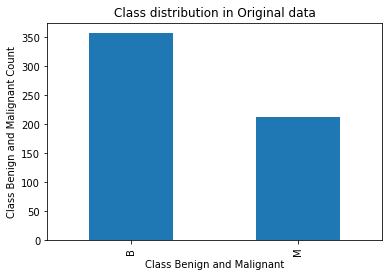

In [0]:
import matplotlib.pyplot as plt
Y.value_counts().plot(kind='bar')
plt.title('Class distribution in Original data')
plt.xlabel('Class Benign and Malignant')
plt.ylabel('Class Benign and Malignant Count')
plt.show()

In [0]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
print('Number of Benign: ',Y.value_counts()[0])
print('Number of Malignant : ',Y.value_counts()[1])

Number of Benign:  357
Number of Malignant :  212


## Data Visualization

We have all the features, but i do not know about which feature is more important, so we will do some data visualization on our data

In [0]:
X.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

From the describe method we can see that our all the features are not in same scale some feature have vary high values and some has very low, in this can we will use Standarization method to make all the feature in same scale.

#### **PDF of all the features**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

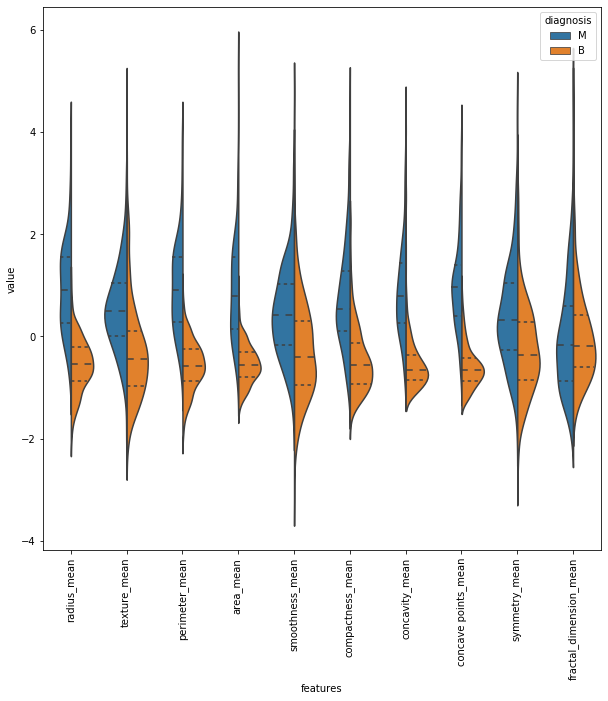

In [0]:
# first ten features
data_dia = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the violin plot we can identify that which features are good for data classification.

like **concave points_mean** and **concavity_mean** has large diffrence on there median values, so this features may be very good for data classification.

but on the other hand **Median** value of **symmetry_mean** and **fractal_dimension_mean** are very close, like data present in **Benign** and **Malignant** must have similar values because of that **we can not distinguish Benign and Malignant cancer from these record properly**.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

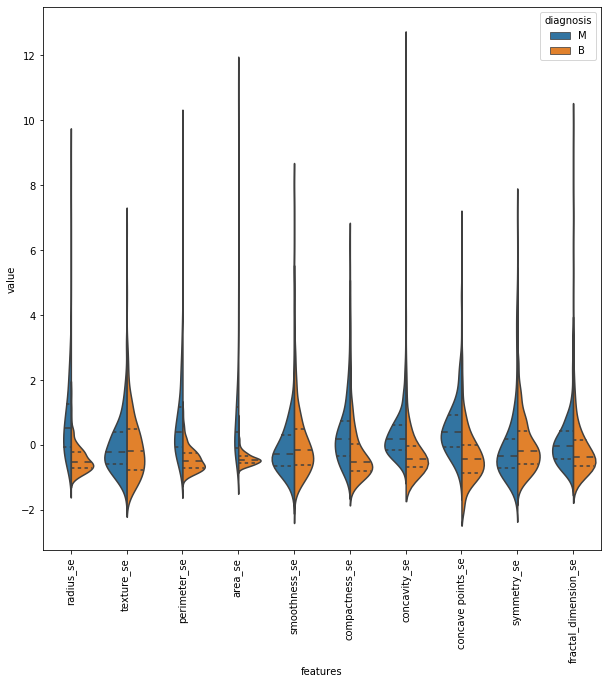

In [0]:
# Second ten features
data = pd.concat([Y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Here **radius_se**, **perimeter_se** and **area_se** has a significance difference in median value So these feature may be important for cancer classification.

But **texture_se**, **smoothness_se** has very less difference in median value, so these feature may not important for cancer classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

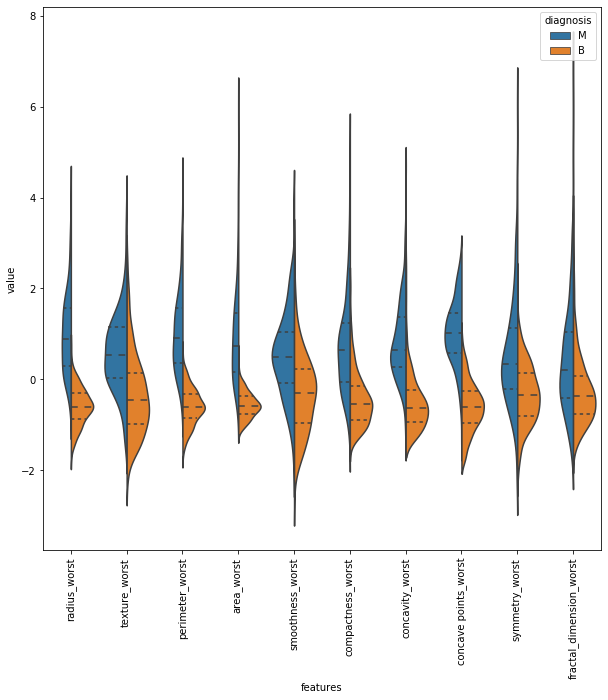

In [0]:
# Third ten features
data = pd.concat([Y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Here **area_worst**, **concavity_worst** and **concave points_worst** has a significance difference in median value So these feature may be important for cancer classification.

But **symmerty_worst**, **fractal_dimension_worst** has very less difference in median value, so these feature may not important for cancer classification

#### **Box Plot**
Box plot is an alternative of voilin plot also used to identify which features are useful for classification.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

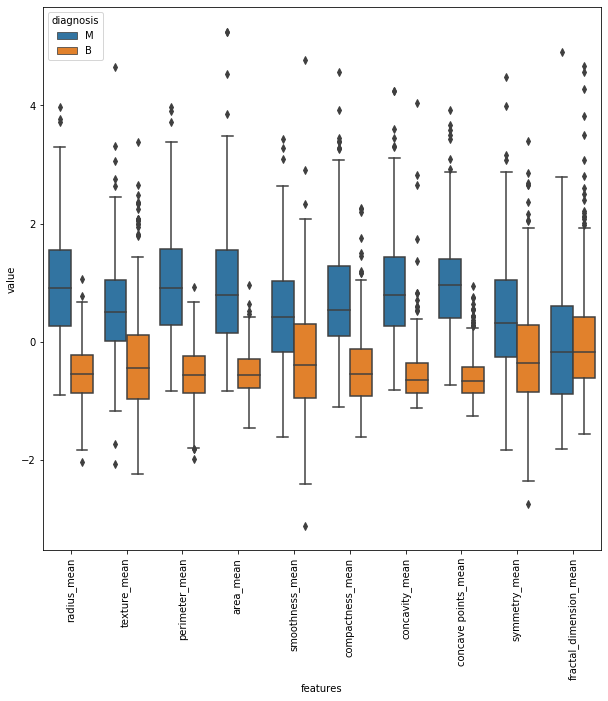

In [0]:
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Here **radius_mean**, **perimeter_mean** and **area_mean** has a significance difference in median value So these feature may be important for cancer classification. but box plot of these feature are nearly same, so we can take any one feature from these feature to reduce the dimention of data or to reduce the computation power for prediction, because these feature having nearly same 25, 50 and 75 percentile value. so we can say our model will not learn different thing if we use all of these feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

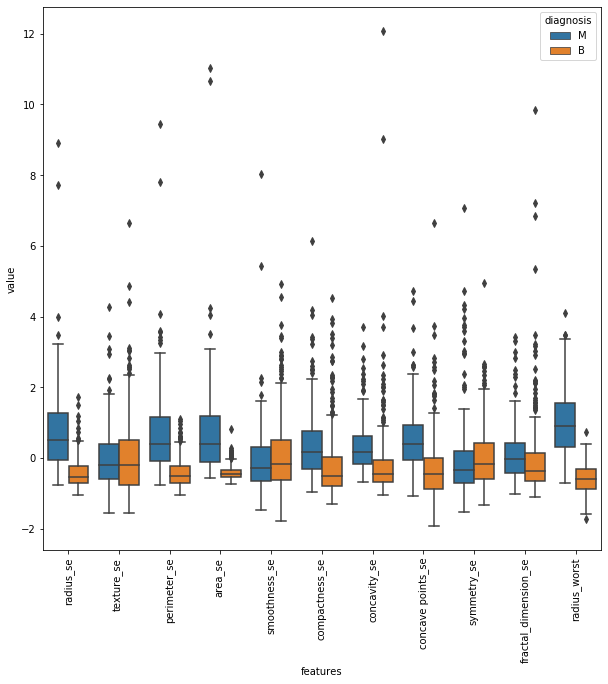

In [0]:
data = pd.concat([Y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Here **radius_se**, **perimeter_se** has a significance difference in median value So these feature may be important for cancer classification. but box plot of these feature are nearly same, so we can take any one feature from these feature to reduce the dimention of data or to reduce the computation power for prediction, because these feature having nearly same 25, 50 and 75 percentile value. so we can say our model will not learn different thing if we use all of these feature.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

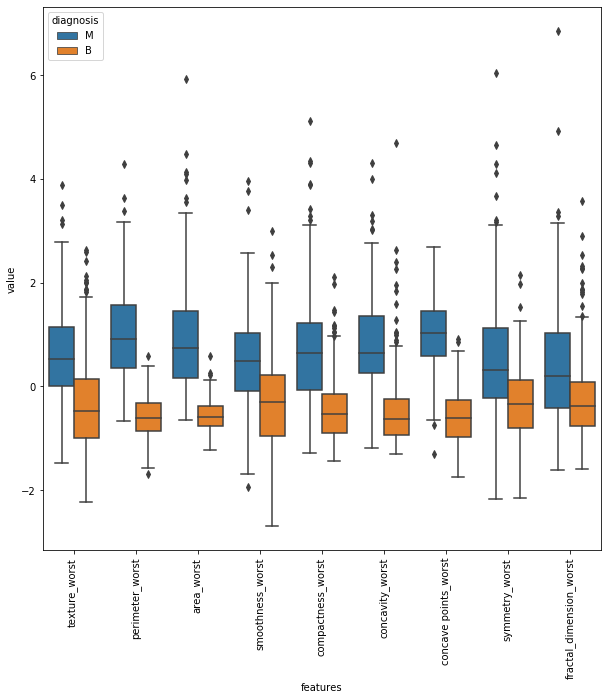

In [0]:
data = pd.concat([Y,data_n_2.iloc[:,21:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

To identify which feature has same distribution of data, we can use **joint plot**.
If we are getting straight line for the two feature, we can say that these two feature are having same distribution of data, or we can remove one feature from data.

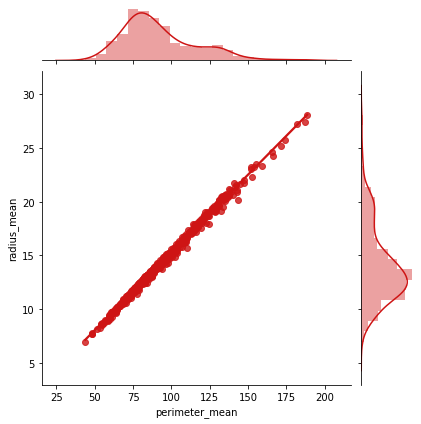

In [0]:
sns.jointplot(X.loc[:,'perimeter_mean'], X.loc[:,'radius_mean'], kind="regg", color="#ce1414")

we can see that we are getting straigth line for **perimeter_mean** and **radius_mean**, So we can say that these two feature are co-related or having same distribution of data, so we will choose any one from these feature for classification.

## **Pair Grid**
We can also compare three or more feature at a time using Pair Grid.

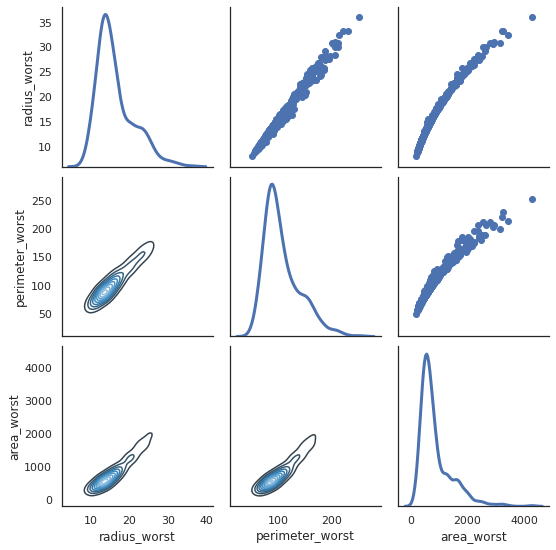

In [0]:
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Here we are getting stragiht line for these feature, so we can take any one feature for cancer classification. 

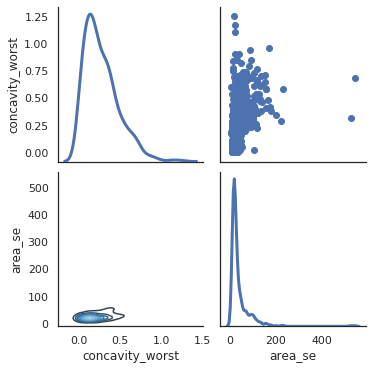

In [0]:
sns.set(style="white")
df = X.loc[:,['concavity_worst','area_se']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Here we can see that we are not getting straight line for these two features because this two feature are having different distribution.

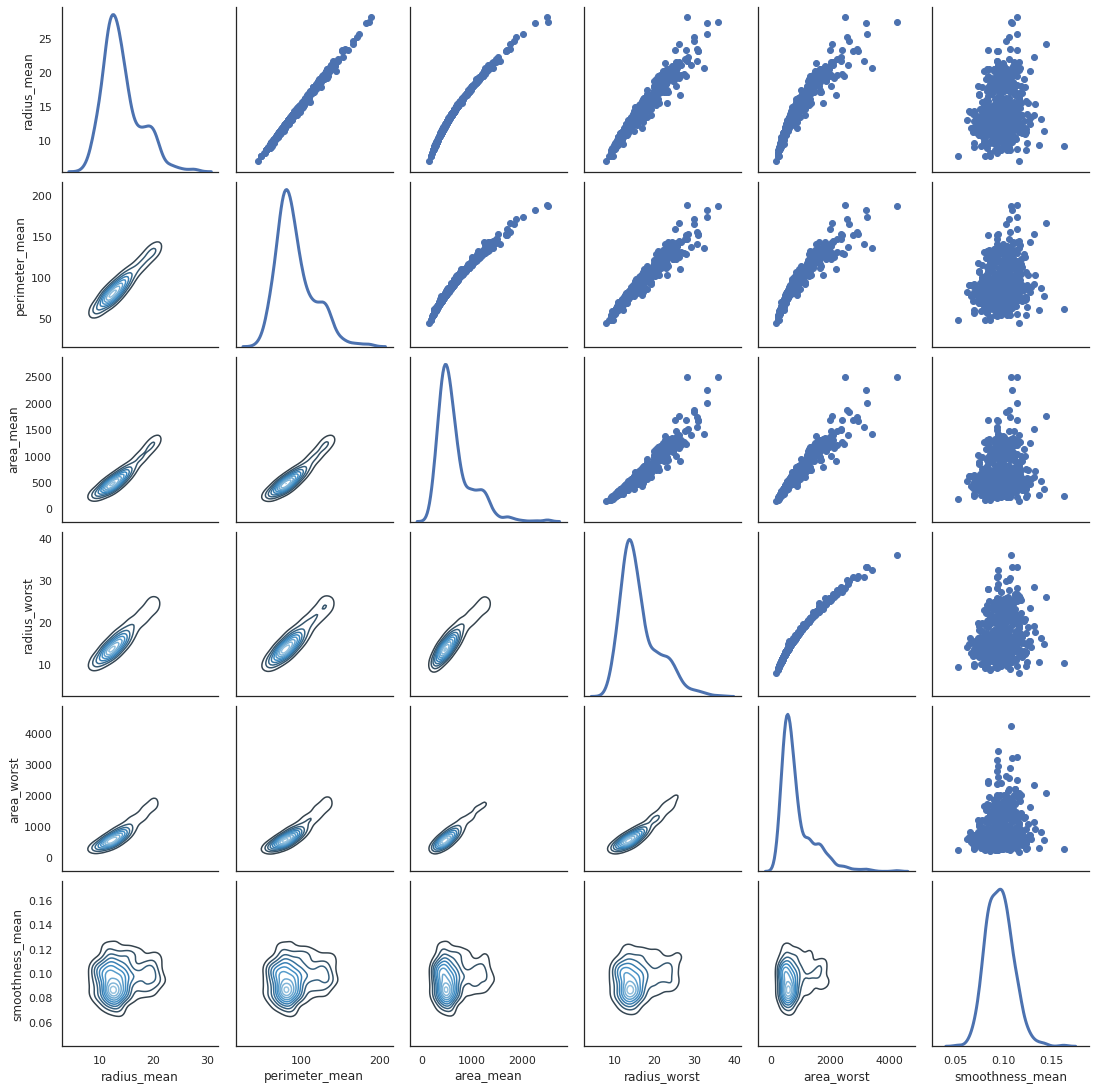

In [0]:
sns.set(style="white")
df = X.loc[:,['radius_mean','perimeter_mean','area_mean', 'radius_worst','area_worst','smoothness_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Correlation Map

we can observe correlation among all the features using correlation map.

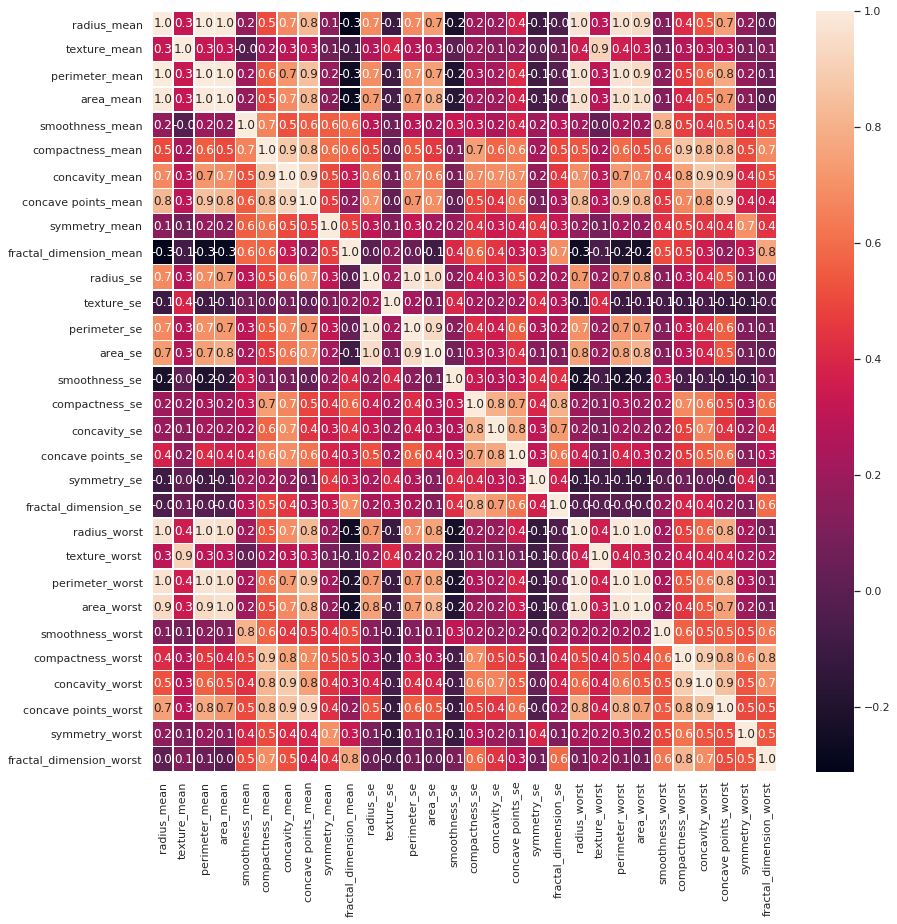

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

from the diagram 1.0 indicates that these features have same distribution. we can remove those features except one which are having same distribution, using the diagram. I have removed **'perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se'** features because these features having 1.0 value and corelated with other feature.

In [0]:
drop_list = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se']
x = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 25 columns]

Shape of data after removing the corelate features

In [0]:
x.shape

(569, 25)

Correlation map of rest of the features

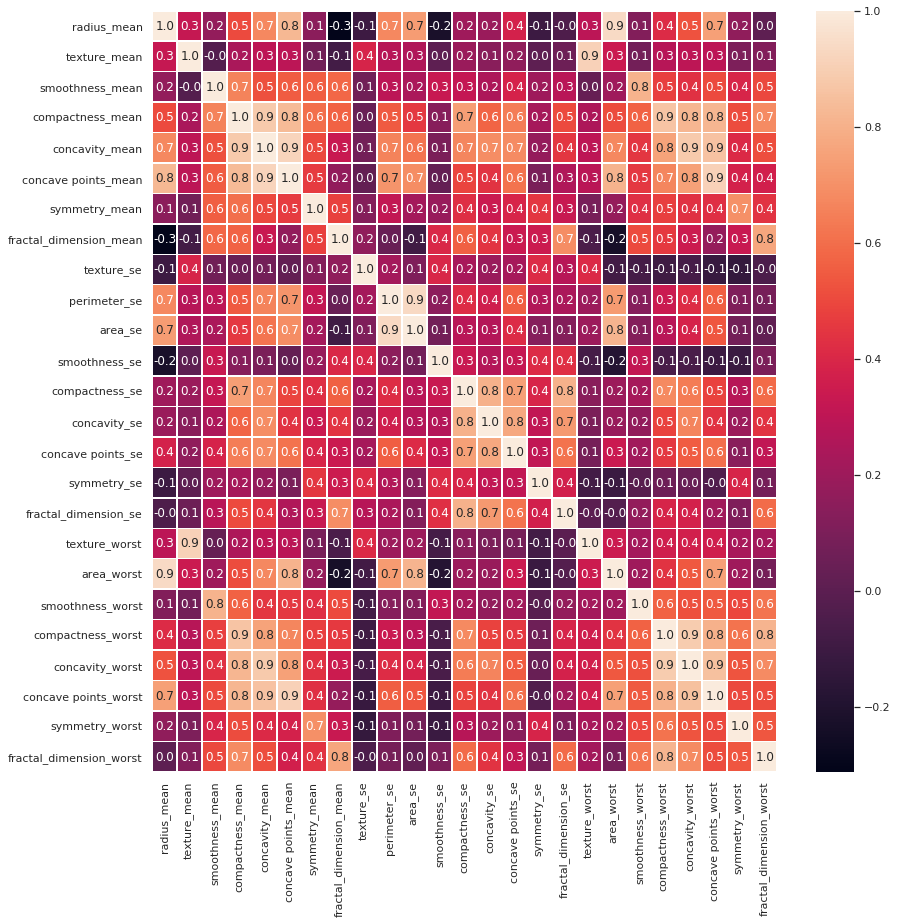

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
# Function is used to convert text class to neumerical class
def Y_class(Y):
  if Y == 'B':
    return 0
  elif Y == 'M':
    return 1

#changing 
actual_value = Y
category = actual_value.map(Y_class) 
Y_class = category
print("Number of data points in our data", Y_class.shape)
Y_class.head(30)

Number of data points in our data (569,)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: diagnosis, dtype: int64

In [0]:
Y.head(30)

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
25    M
26    M
27    M
28    M
29    M
Name: diagnosis, dtype: object

In [0]:
# Split the data into train, validation and test
from sklearn.model_selection import train_test_split
X_t, X_test, Y_t, Y_test = train_test_split(x, Y_class, test_size=0.05, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.05, random_state=42)

In [0]:
# Shape of train , validation and test data
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((513, 25), (513,), (27, 25), (27,))

# Applying Model to the data for prediction

## Logistic Regression :

Logistic regression is used for classification problem, this algorithm will create a line or plane to separate the data of different classes.
the algoritham uses log loss as a loss function and l2 regularization as regularization parameter.

to get the plane or line equation algoritham uses weights corrospond to each feature. like if i have 2 feature in data. so my line equation will look like:

Y = 'w1 * X1 + w2 * X2 + w3'
here X1 and X2 are features and w1, w2 and w3 are wights corrosponding to each feature, which will decide while training the logistic regression model.

In [0]:
# hyperparaeter values for logistic regression
C_list = []
i = 0.0001
for count in range(25):
    C_list.append(i)
    i = round(i+0.001,4)

#### **When do you consider adding the “regularization parameter” to the model? and how it**
#### **will help to improve the model performance?**



Here I have used l2 as regularization parameter, regularization parameter is used to avoid overfitting and underfitting in Data. Because our loss function for any model is described as ;

loss function = loss+lambda*regularize parameter

here lambda is learning parameter, if we are giving very less value to lambda, it means that we are giving more importance to loss so if we are getting very low loss for the model, so there is a case that we are getting good accuracy at trainig time but less in test time. and

if we are giving very large value to lambda in that case we are not giving importance to loss means we are not giving importance to learning of the model.

to balance this situation we are using lambda as learning parameter in our loss function.



In [0]:
# function is used for training logistic regression model
def AUC_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for C in C_list:
    #     Applying Logistic Regression with l2 regularization on trainng data for each C
        clf = LogisticRegression(C=C,penalty="l2")
        clf.fit(X_train, Y_train)
                # predict the response
        probs_train = clf.predict_proba(X_train)
        preds_train = probs_train[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
        probs_cv = clf.predict_proba(X_cv)
        preds_cv = probs_cv[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, preds_cv)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
    
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

Because the data is imbalanced so i have used AUC as my performance matrix

### Learning Curve

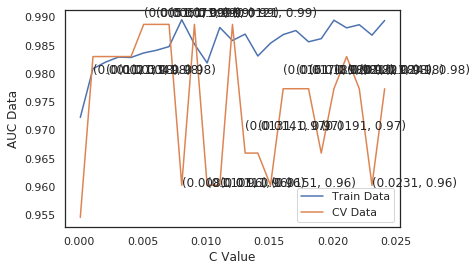

Train_Accuracy  CV_Accuracy
0.0001        0.972201     0.954545
0.0011        0.980821     0.982955
0.0021        0.981978     0.982955
0.0031        0.982858     0.982955
0.0041        0.982793     0.982955
0.0051        0.983591     0.988636
0.0061        0.984064     0.988636
0.0071        0.984716     0.988636
0.0081        0.989457     0.960227
0.0091        0.985156     0.988636
0.0101        0.981832     0.960227
0.0111        0.988089     0.960227
0.0121        0.985791     0.988636
0.0131        0.986915     0.965909
0.0141        0.983054     0.965909
0.0151        0.985319     0.960227
0.0161        0.986834     0.977273
0.0171        0.987551     0.977273
0.0181        0.985563     0.977273
0.0191        0.986117     0.965909
0.0201        0.989376     0.977273
0.0211        0.988023     0.982955
0.0221        0.988577     0.977273
0.0231        0.986736     0.960227
0.0241        0.989327     0.977273

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train, Y_train, X_val, Y_val)

To choose the best hyperparameter i used hyperparameter vs AUC performance graph.

Overfitting Case - for any C value if i am geeting good accuracy at train time but less in Validation time.

Underfitting Case - for any C value if i am not geeting good accuracy at train and Validation time.

Best Hyper Parameter - we will choose that C value for which i am getting good accuracy on train and test time.

In [0]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression(C=C,penalty="l2")
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

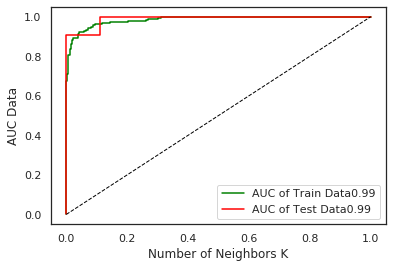

In [0]:
# For the value of C at 0.0091 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train, Y_train, X_test, Y_test)

**we are getting 99% AUC performance for training data and 99% AUC performance for test data for C value 0.0091.**

In [0]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[316   7]
 [ 22 168]]
Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


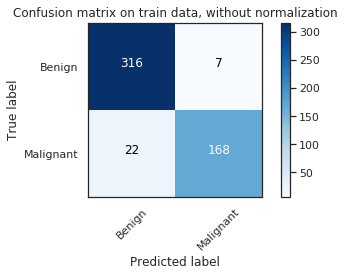

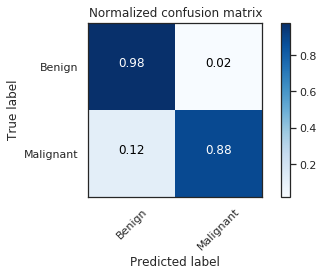

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Training Data, we can see that our model has classified 316 record correct for Benign out of 323 and 168 record correct for Malignant out of 190.**

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


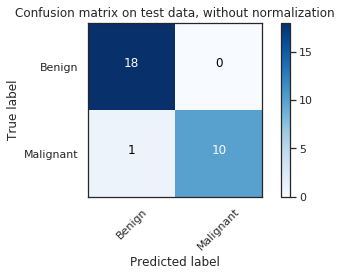

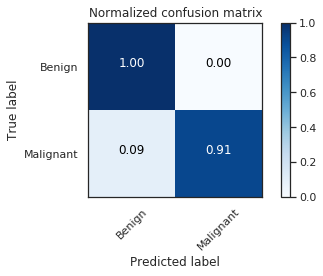

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Test Data, we can see that our model has classified 18 record correct for Benign out of 18 and 10 record correct for Malignant out of 11**

In [0]:
# This function will give weight of all the feature
def most_informative_feature_for_class(data, classifier):
    topn = sorted(zip(classifier.coef_[0], data.columns ), reverse=True)
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

Most Important Feature for class Logistic Regression : 


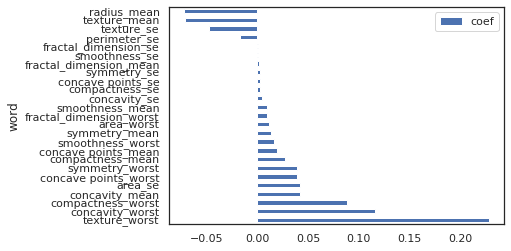

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x,clf)
ax = df.plot.barh(x='word', y='coef')

 from the above plot we can identify which features are getting how much weight in our model. if feature is not getting any weights it means that feature is not useful for prediction. like here **smoothness_se** and **fractal_dimension_se** is not having any weights. So will remove these features and verify the accuracy of model

In [0]:
clf.coef_

array([[-0.07, -0.07,  0.01,  0.03,  0.04,  0.02,  0.01,  0.  , -0.05,
        -0.02,  0.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.23,
         0.01,  0.02,  0.09,  0.12,  0.04,  0.04,  0.01]])

### Removing feature which are having zero weights value.

In [0]:
drop_list = ['fractal_dimension_se', 'smoothness_se']
x_new = x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 23 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_t_new, X_test_new, Y_t_new, Y_test_new = train_test_split(x_new, Y_class, test_size=0.05, random_state=42)
X_train_new, X_val_new, Y_train_new, Y_val_new = train_test_split(X_t_new, Y_t_new, test_size=0.05, random_state=42)

In [0]:
X_train_new.shape, Y_train_new.shape, X_val_new.shape, Y_val_new.shape

((513, 23), (513,), (27, 23), (27,))

### Learning Curve

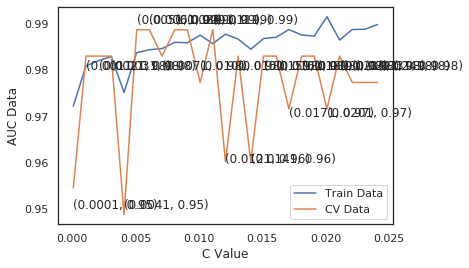

Train_Accuracy  CV_Accuracy
0.0001        0.972201     0.954545
0.0011        0.980854     0.982955
0.0021        0.981994     0.982955
0.0031        0.982842     0.982955
0.0041        0.975134     0.948864
0.0051        0.983722     0.988636
0.0061        0.984325     0.988636
0.0071        0.984569     0.982955
0.0081        0.985921     0.988636
0.0091        0.985824     0.988636
0.0101        0.987453     0.977273
0.0111        0.985644     0.988636
0.0121        0.987665     0.960227
0.0131        0.986606     0.982955
0.0141        0.984439     0.960227
0.0151        0.986736     0.982955
0.0161        0.987013     0.982955
0.0171        0.988675     0.971591
0.0181        0.987502     0.982955
0.0191        0.987258     0.982955
0.0201        0.991429     0.971591
0.0211        0.986410     0.982955
0.0221        0.988692     0.977273
0.0231        0.988740     0.977273
0.0241        0.989767     0.977273

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_new, Y_train_new, X_val_new, Y_val_new)

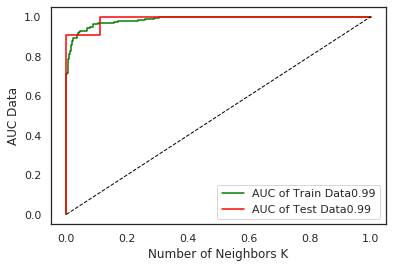

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train_new, Y_train_new, X_test_new, Y_test_new)

Confusion matrix, without normalization
[[316   7]
 [ 21 169]]
Normalized confusion matrix
[[0.98 0.02]
 [0.11 0.89]]


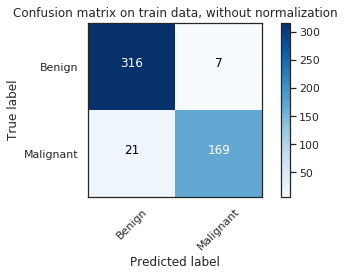

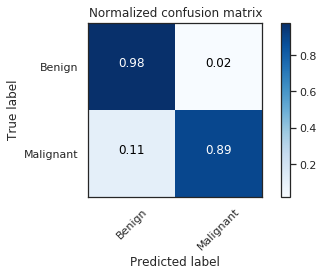

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Training Data, we can see that our model has classified 316 record correct for Benign out of 323 and 169 record correct for Malignant out of 190. So after removing 'fractal_dimension_se', 'smoothness_se' unimportant feature AUC performance of Malignant increased by 1.**

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


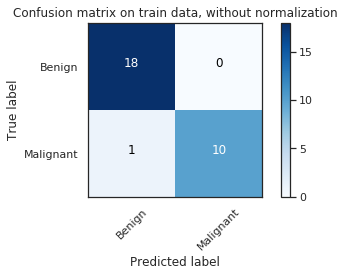

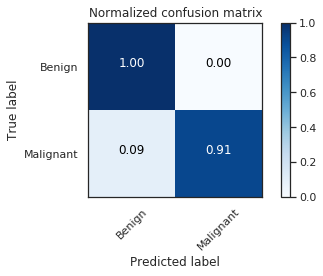

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**So after removing 'fractal_dimension_se', 'smoothness_se' unimportant feature AUC performance of test data has not changed.**

Most Important Feature for class Logistic Regression : 


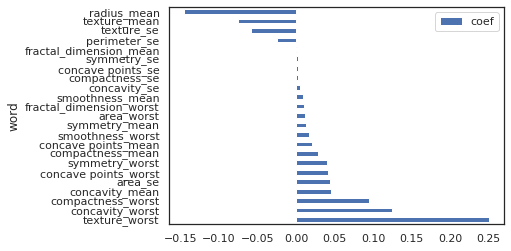

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new,clf)
ax = df.plot.barh(x='word', y='coef')

**From the plot we can see that 'fractal_dimension_mean' has got weight value zero. so now ahead we will remove this feature from data and see what accuracy we will get.**

In [0]:
clf.coef_

array([[-0.14, -0.08,  0.01,  0.03,  0.04,  0.02,  0.01,  0.  , -0.06,
        -0.03,  0.04,  0.  ,  0.01,  0.  ,  0.  ,  0.25,  0.01,  0.02,
         0.09,  0.12,  0.04,  0.04,  0.01]])

**REMOVING 'fractal_dimension_mean' FEATURE**

In [0]:
drop_list = ['fractal_dimension_mean']
x_new_1 = x_new.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new_1.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 22 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_t_new_1, X_test_new_1, Y_t_new_1, Y_test_new_1 = train_test_split(x_new_1, Y_class, test_size=0.05, random_state=42)
X_train_new_1, X_val_new_1, Y_train_new_1, Y_val_new_1 = train_test_split(X_t_new_1, Y_t_new_1, test_size=0.05, random_state=42)

In [0]:
X_train_new_1.shape, Y_train_new_1.shape, X_val_new_1.shape, Y_val_new_1.shape

((513, 22), (513,), (27, 22), (27,))

### Learning Curve

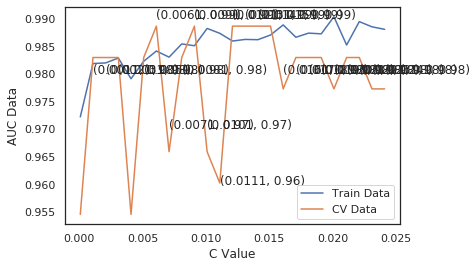

Train_Accuracy  CV_Accuracy
0.0001        0.972201     0.954545
0.0011        0.981864     0.982955
0.0021        0.981978     0.982955
0.0031        0.982858     0.982955
0.0041        0.979110     0.954545
0.0051        0.982271     0.982955
0.0061        0.984129     0.988636
0.0071        0.983021     0.965909
0.0081        0.985416     0.982955
0.0091        0.985090     0.988636
0.0101        0.988219     0.965909
0.0111        0.987339     0.960227
0.0121        0.985938     0.988636
0.0131        0.986231     0.988636
0.0141        0.986182     0.988636
0.0151        0.987029     0.988636
0.0161        0.988854     0.977273
0.0171        0.986622     0.982955
0.0181        0.987372     0.982955
0.0191        0.987241     0.982955
0.0201        0.990337     0.977273
0.0211        0.985221     0.982955
0.0221        0.989457     0.982955
0.0231        0.988512     0.977273
0.0241        0.988056     0.977273

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_new_1, Y_train_new_1, X_val_new_1, Y_val_new_1)

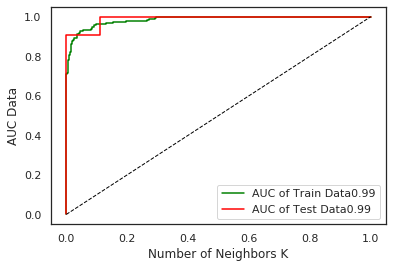

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train_new_1, Y_train_new_1, X_test_new_1, Y_test_new_1)

Confusion matrix, without normalization
[[316   7]
 [ 23 167]]
Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


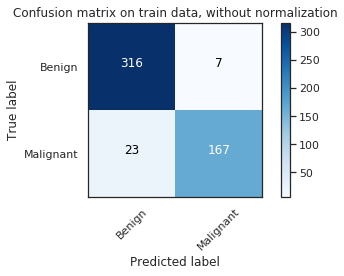

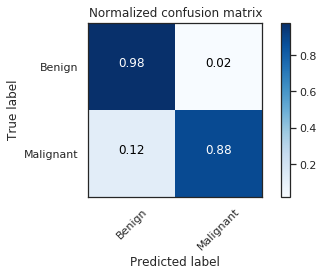

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new_1, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


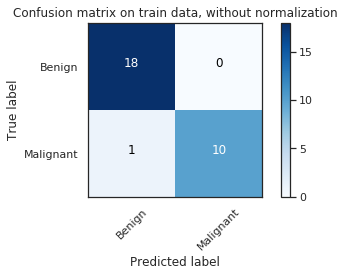

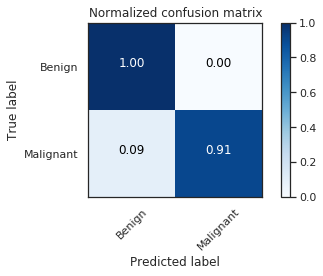

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new_1, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


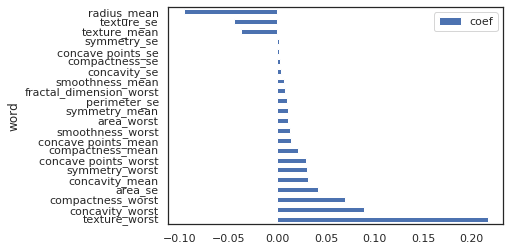

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new_1,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
clf.coef_

array([[-0.1 , -0.04,  0.01,  0.02,  0.03,  0.01,  0.01, -0.04,  0.01,
         0.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.22,  0.01,  0.01,  0.07,
         0.09,  0.03,  0.03,  0.01]])

**From the confusion Matrix we can see that AUC performance for Maliganant Cancer is decreased by 2, but it is not effecting our test result.**

**But at the end we need to select best model, so we will not consider this model for predicting the result.**

# SVM

Support vector machine is used to solve Supervised Machine Learning Problem(Classification). In support Vector Machine the algoritham will try to predict the best plane or line on the basis of support vectors of different classes.

this algoritham uses hinge loss as a loss function and l2 as regularization parameter.

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [0]:
def AUC_svm_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for alpha in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = SGDClassifier(alpha=alpha,penalty="l2", loss="hinge")
        clf.fit(X_train, Y_train)
                # predict the response
        preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
        clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
        clf_sigmoid.fit(X_train, Y_train)
        
#       predicting probabilistic value from the Train data.
        prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
        
        
#       predicting probabilistic value from the cross validation data.
        preds_cv = clf.predict(X_cv)
        prob_cv_sigmoid = clf_sigmoid.predict_proba(X_cv)[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, prob_cv_sigmoid)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    # alpha_log = [round(log10(x),2) for x in r]
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    # Plotting the graph between alpha and its AUC value to find best alpha for our model.    
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Value of Alpha')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

### Learning Curve

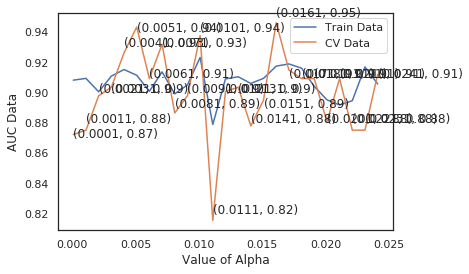

Train_Accuracy  CV_Accuracy
0.0001        0.908074     0.872159
0.0011        0.909239     0.875000
0.0021        0.900399     0.897727
0.0031        0.910722     0.903409
0.0041        0.915097     0.926136
0.0051        0.911317     0.943182
0.0061        0.900693     0.909091
0.0071        0.913533     0.931818
0.0081        0.898990     0.886364
0.0091        0.904905     0.897727
0.0101        0.923057     0.937500
0.0111        0.878760     0.815341
0.0121        0.908897     0.900568
0.0131        0.910298     0.903409
0.0141        0.905891     0.877841
0.0151        0.909263     0.894886
0.0161        0.917346     0.946023
0.0171        0.918788     0.914773
0.0181        0.916018     0.909091
0.0191        0.903976     0.909091
0.0201        0.895071     0.880682
0.0211        0.891641     0.909091
0.0221        0.894468     0.875000
0.0231        0.916840     0.875000
0.0241        0.905581     0.911932

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train, Y_train, X_val, Y_val)

In [0]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(alpha=C,penalty="l2", loss="hinge")
    clf.fit(X_train, Y_train)
            # predict the response
    preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
    clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
    clf_sigmoid.fit(X_train, Y_train)

#       predicting probabilistic value from the Train data.
    prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
    auc_train = metrics.auc(fpr_train, tpr_train)


#       predicting probabilistic value from the cross validation data.
    preds_test = clf.predict(X_test)
    prob_test_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, prob_test_sigmoid)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, preds_test, preds_train

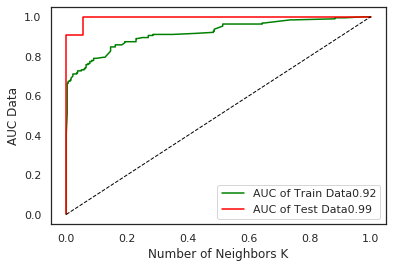

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0141,X_train, Y_train, X_test, Y_test)

Train Data AUC Accuracy : 92%
Test Data AUC Accuracy: 99%

Confusion matrix, without normalization
[[209 114]
 [ 18 172]]
Normalized confusion matrix
[[0.65 0.35]
 [0.09 0.91]]


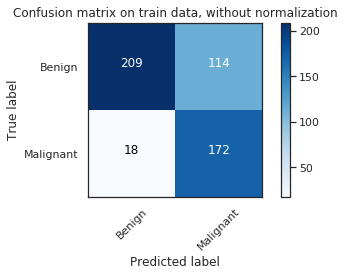

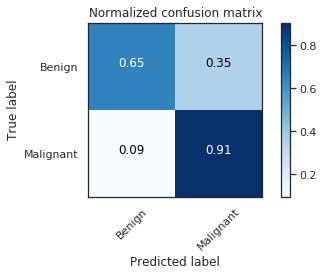

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[12  6]
 [ 0 11]]
Normalized confusion matrix
[[0.67 0.33]
 [0.   1.  ]]


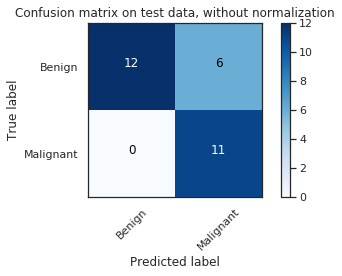

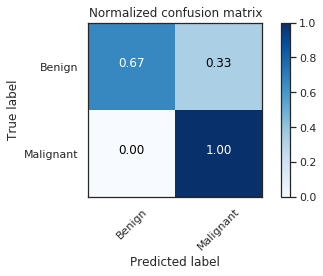

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Training Data, we can see that SVM model has classified 209 record correct for Benign out of 323 and 172 record correct for Malignant out of 190.**

**At Test Time SVM Model has classified 12 record correct for Benign out of 18 and 11 record correct for Malignant out of 11.**

## **But overall performance of model is less as compare to Logistic Regression, So we can skip this model for further prediction.**

Most Important Feature for class Logistic Regression : 


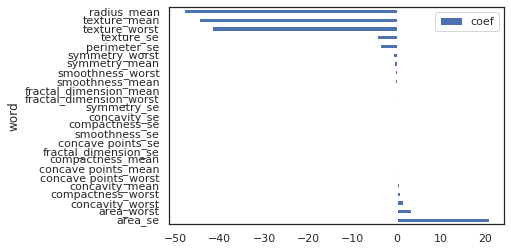

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
clf.coef_

array([[-4.80e+01, -4.47e+01, -3.85e-01,  2.29e-02,  4.45e-01,  1.78e-01,
        -7.26e-01, -2.94e-01, -4.56e+00, -3.77e+00,  2.07e+01, -3.19e-02,
        -3.58e-02, -3.84e-02, -2.83e-02, -1.00e-01, -1.50e-02, -4.18e+01,
         3.18e+00, -4.11e-01,  7.20e-01,  1.32e+00,  2.87e-01, -8.13e-01,
        -2.41e-01]])

## **REMOVING ALL FEATURES WHICH ARE HAVING ZERO AS WEIGHT VALUE**

In [0]:
drop_list = ['fractal_dimension_worst', 'symmetry_se', 'concavity_se', 'compactness_se', 'smoothness_se', 'concave points_se', 'fractal_dimension_se', 'compactness_mean', 'concave points_mean', 'concave points_worst']
x_new_2 = x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new_2.head()

radius_mean  texture_mean  ...  concavity_worst  symmetry_worst
0        17.99         10.38  ...           0.7119          0.4601
1        20.57         17.77  ...           0.2416          0.2750
2        19.69         21.25  ...           0.4504          0.3613
3        11.42         20.38  ...           0.6869          0.6638
4        20.29         14.34  ...           0.4000          0.2364

[5 rows x 15 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_t_new_2, X_test_new_2, Y_t_new_2, Y_test_new_2 = train_test_split(x_new_2, Y_class, test_size=0.05, random_state=42)
X_train_new_2, X_val_new_2, Y_train_new_2, Y_val_new_2 = train_test_split(X_t_new_2, Y_t_new_2, test_size=0.05, random_state=42)

In [0]:
X_train_new_2.shape, Y_train_new_2.shape, X_val_new_2.shape, Y_val_new_2.shape

((513, 15), (513,), (27, 15), (27,))

### Learning Curve

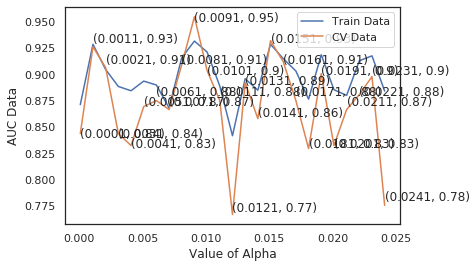

Train_Accuracy  CV_Accuracy
0.0001        0.871167     0.843750
0.0011        0.928393     0.926136
0.0021        0.904489     0.906250
0.0031        0.888415     0.843750
0.0041        0.884341     0.832386
0.0051        0.893490     0.869318
0.0061        0.889783     0.875000
0.0071        0.868030     0.866477
0.0081        0.915732     0.909091
0.0091        0.931465     0.954545
0.0101        0.921053     0.903409
0.0111        0.888789     0.875000
0.0121        0.841690     0.767045
0.0131        0.895731     0.892045
0.0141        0.884862     0.857955
0.0151        0.928450     0.931818
0.0161        0.914836     0.911932
0.0171        0.903063     0.875000
0.0181        0.876389     0.829545
0.0191        0.918478     0.900568
0.0201        0.885343     0.832386
0.0211        0.879949     0.866477
0.0221        0.912767     0.880682
0.0231        0.917460     0.897727
0.0241        0.884039     0.775568

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train_new_2, Y_train_new_2, X_val_new_2, Y_val_new_2)

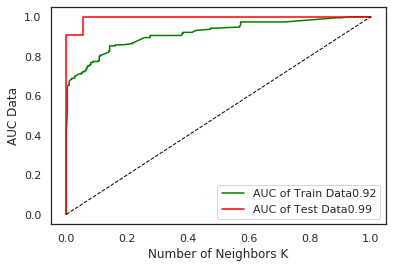

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0201,X_train_new_2, Y_train_new_2, X_test_new_2, Y_test_new_2)

Confusion matrix, without normalization
[[157 166]
 [  9 181]]
Normalized confusion matrix
[[0.49 0.51]
 [0.05 0.95]]


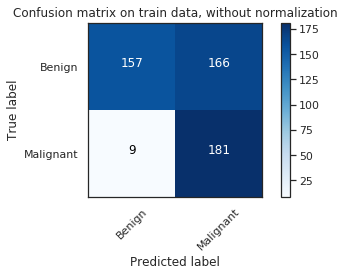

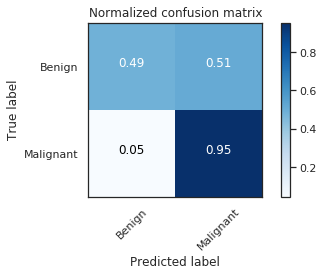

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new_2, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[10  8]
 [ 0 11]]
Normalized confusion matrix
[[0.56 0.44]
 [0.   1.  ]]


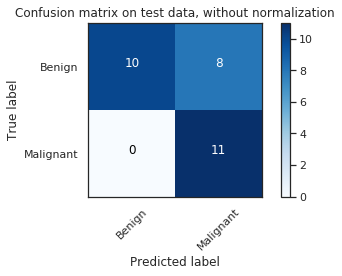

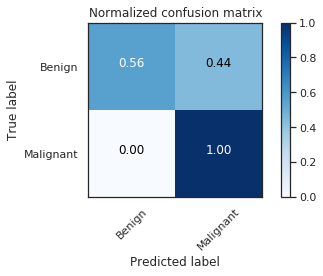

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new_2, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


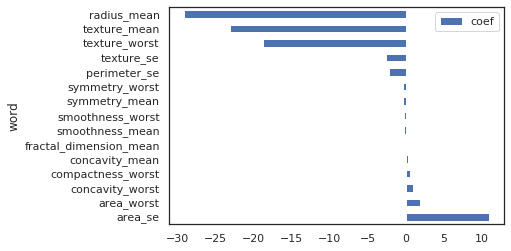

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new_2,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
clf.coef_

array([[-29.14, -23.1 ,  -0.22,   0.31,  -0.42,  -0.17,  -2.56,  -2.25,
         10.9 , -18.75,   1.88,  -0.23,   0.55,   0.95,  -0.43]])

**After removing the unimportant feature :**
**confusion matrix of Training Data, we can see that SVM model has classified 157 record correct for Benign out of 323 and 181 record correct for Malignant out of 190.**

**At Test Time SVM Model has classified 10 record correct for Benign out of 18 and 11 record correct for Malignant out of 11.**

## **But overall performance of model is less as compare to Logistic Regression, So we can skip this model for further prediction.**

# Random Forest

This is an esembled model, which creates multiple decision tress to solve the classification and regression problem.

if problem is classification, then on that basis of majority of output of all the decision trees for the particular class, it will classify the record.

if problem is regression then it uses average of all the output of decision trees and give the result.

In [0]:
#  These are hyperparameter for Random Forest Algoritham.

max_depth = [1,5,10,50,500,1000]  # Max depth that we want for a particular tree.
n_estimators = [5,10,100,500]  # specify no of trees for the model.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
# Function is used to train the random Model
def AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators):
    AUC_Train = np.zeros((len(max_depth), len(n_estimators)))
    AUC_CV = np.zeros((len(max_depth), len(n_estimators)))
    for depth in range(len(max_depth)):
        for estimators in range(len(n_estimators)):
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
            clf = RandomForestClassifier(max_depth=max_depth[depth], n_estimators=n_estimators[estimators])
            clf.fit(X_train, Y_train)
                # predict the response
            probs_train = clf.predict_proba(X_train)
            preds_train = probs_train[:,1]
            fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
#             auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
            probs_cv = clf.predict_proba(X_val)
            preds_cv = probs_cv[:,1]
            fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_val, preds_cv)
#             auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
#             print("Depth ",max_depth[depth],"Split ",min_samples_split[split], "AUC_train ",metrics.auc(fpr_train, tpr_train),
#                  "AUC_cv ",metrics.auc(fpr_cv, tpr_cv))
            
            AUC_Train[depth][estimators] = metrics.auc(fpr_train, tpr_train)
            AUC_CV[depth][estimators] = metrics.auc(fpr_cv, tpr_cv)
    return AUC_Train, AUC_CV

In [0]:
def plot_graph(AUC_train, AUC_cv):
    df_train = pd.DataFrame(AUC_train, columns = n_estimators,index = max_depth)
    df_cv = pd.DataFrame(AUC_cv, columns = n_estimators,index = max_depth)
    # plt.subplot(2, 1, 1)
    sns.heatmap(df_train, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on Train data")
    plt.show()
    # plt.subplot(2, 1, 2)
    sns.heatmap(df_cv, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on CV data")
    plt.show()
    # print(df)

In [0]:
def final_Model_rf(X_train,Y_train,X_test,Y_test,max_depth,n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

In [0]:
AUC_train, AUC_cv = AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators)

### Learning Curve

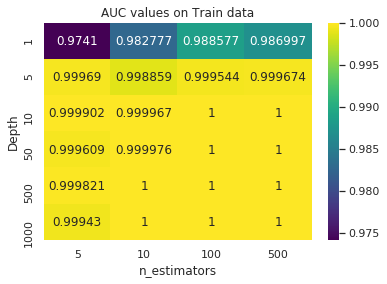

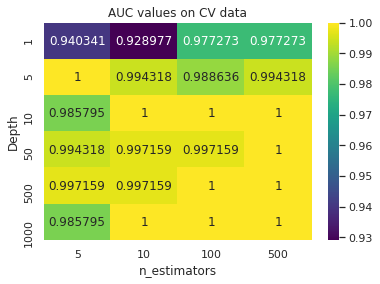

In [0]:
# plotting AUC performance with Depth and n_estimators
plot_graph(AUC_train, AUC_cv)

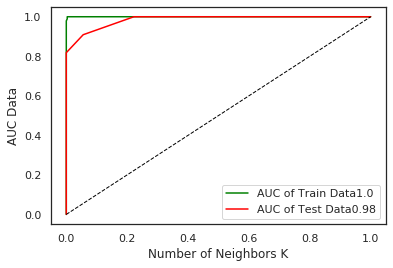

In [0]:
# Training the model on best Depth and n_estimators
clf, y_pred, y_train_pred = final_Model_rf(X_train, Y_train, X_test, Y_test,1000,10)

Confusion matrix, without normalization
[[322   1]
 [  2 188]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


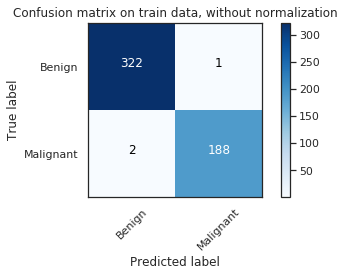

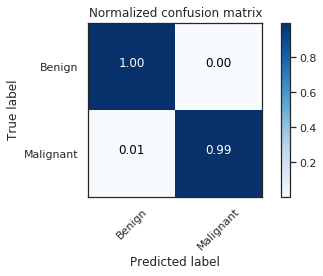

In [0]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Confusion matrix, without normalization
[[17  1]
 [ 1 10]]
Normalized confusion matrix
[[0.94 0.06]
 [0.09 0.91]]


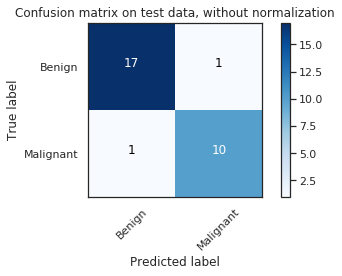

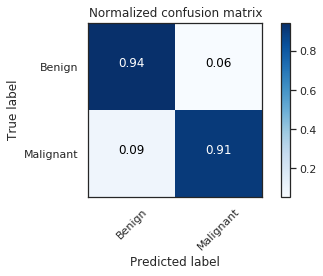

In [0]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


From the confusion matrix of Training Data, we can see that RF model has classified 322 record correct for Benign out of 323 and 188 record correct for Malignant out of 190.

At Test Time RF Model has classified 17 record correct for Benign out of 18 and 10 record correct for Malignant out of 11.

In [0]:
# most important positive class feature
def most_important_feature_rf(feature_names, classifier):
    weight = classifier.feature_importances_
    topn = sorted(zip(weight, feature_names), key = lambda x: x[0])
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [0]:
clf.feature_importances_

array([0.02, 0.03, 0.01, 0.02, 0.07, 0.23, 0.  , 0.01, 0.01, 0.02, 0.03,
       0.01, 0.  , 0.02, 0.  , 0.01, 0.01, 0.02, 0.26, 0.  , 0.03, 0.03,
       0.14, 0.02, 0.  ])

Most Important Feature for class Logistic Regression : 


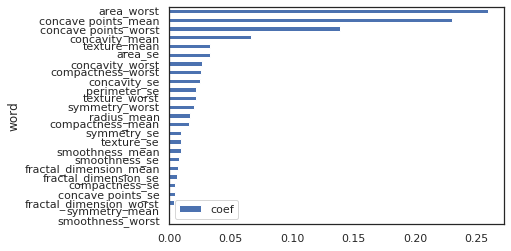

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_important_feature_rf(x.columns,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
import pydotplus
from sklearn.tree import export_graphviz
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "cancer_"+str(iteration)+".png"
    dot_data = export_graphviz(clf, out_file = None,feature_names=feature_names, class_names = target_names)
    # print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    # print(graph)
    graph.write_png(file_name)
    print("Decision tree {} saved as png file".format(iteration+1))

In [0]:
for i in range(len(clf.estimators_)):
    decision_trees_save(clf.estimators_[i], i, x.columns, ['Benign', 'Malignant'])

Decision tree 1 saved as png file
Decision tree 2 saved as png file
Decision tree 3 saved as png file
Decision tree 4 saved as png file
Decision tree 5 saved as png file
Decision tree 6 saved as png file
Decision tree 7 saved as png file
Decision tree 8 saved as png file
Decision tree 9 saved as png file
Decision tree 10 saved as png file


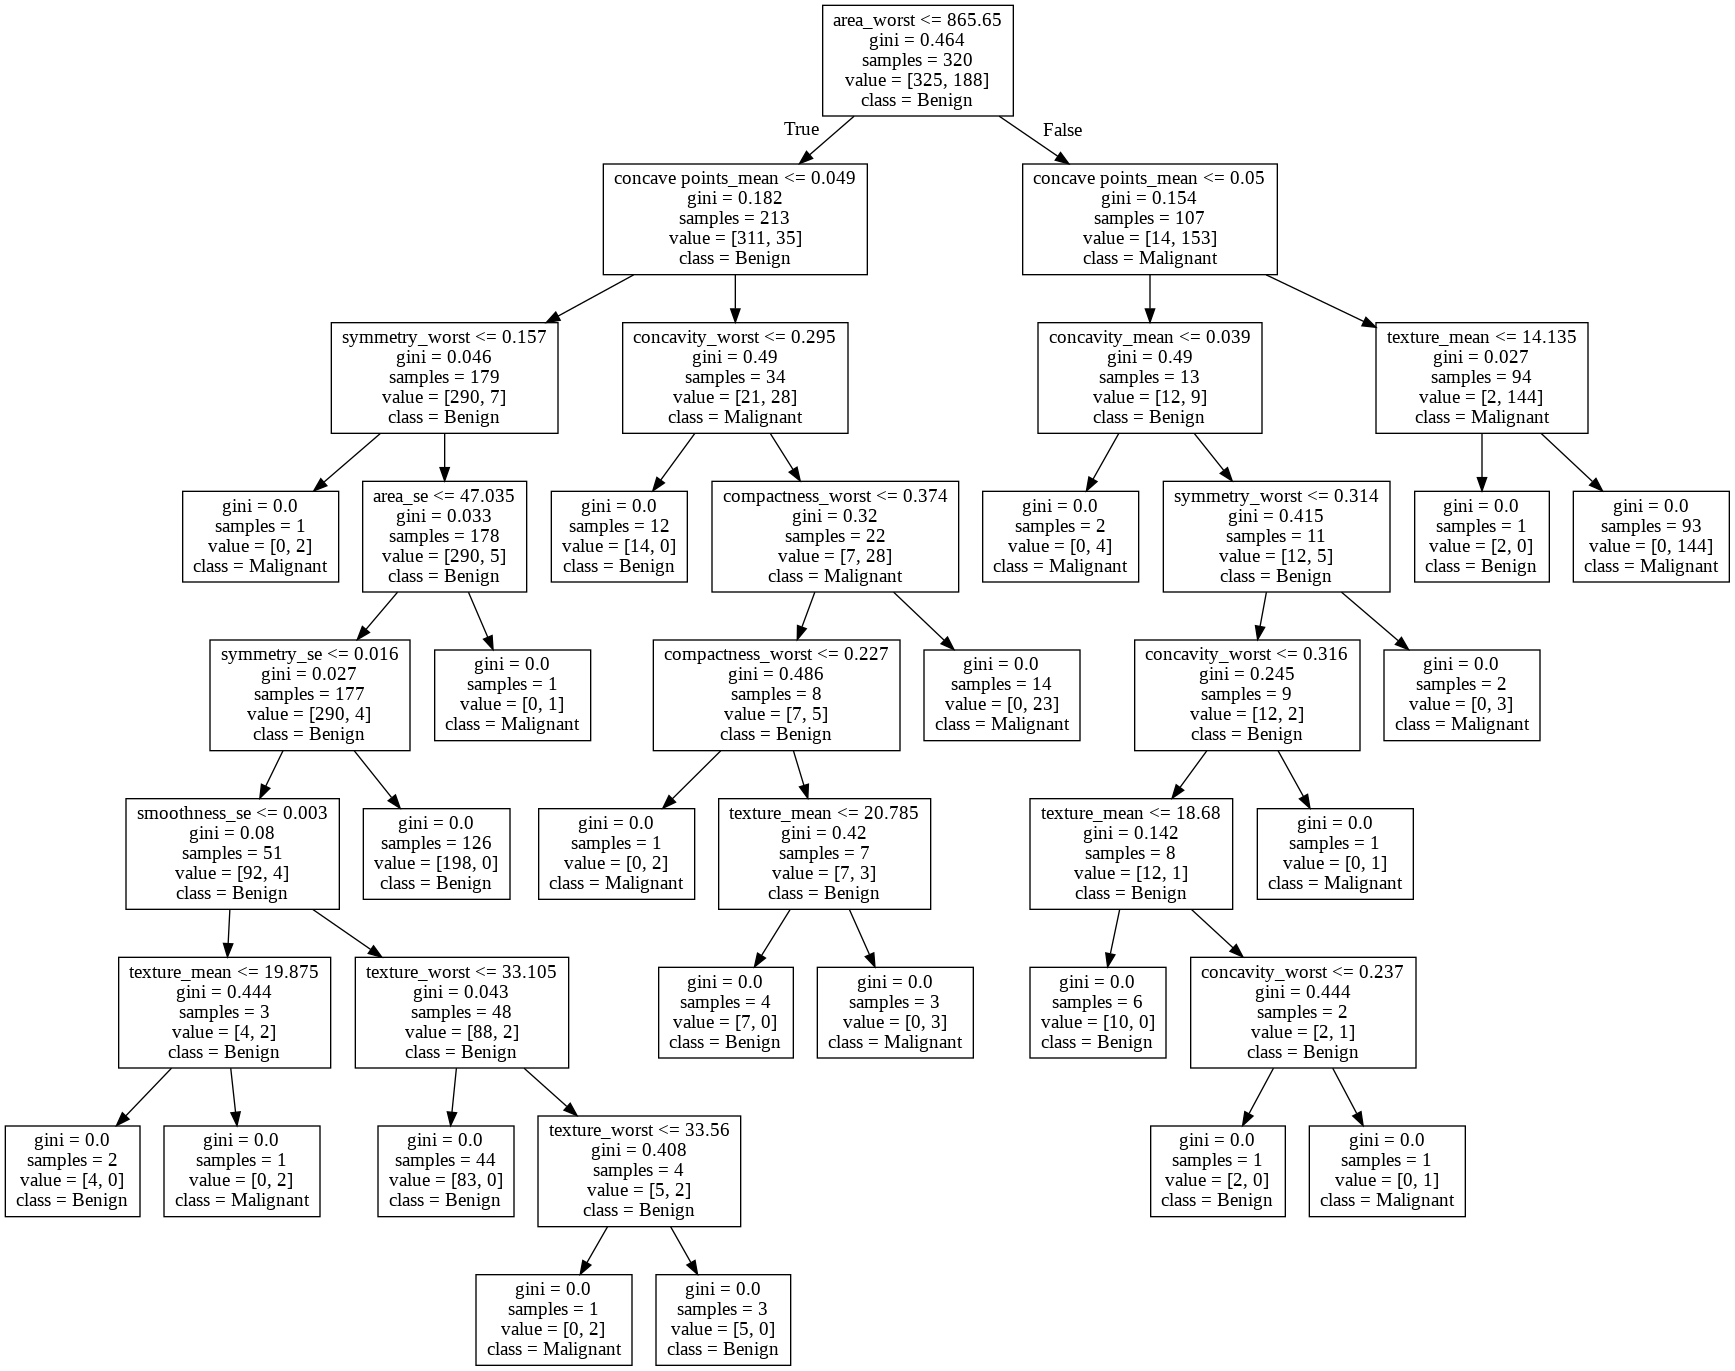

In [0]:
from PIL import Image
image = Image.open("cancer_0.png")
image

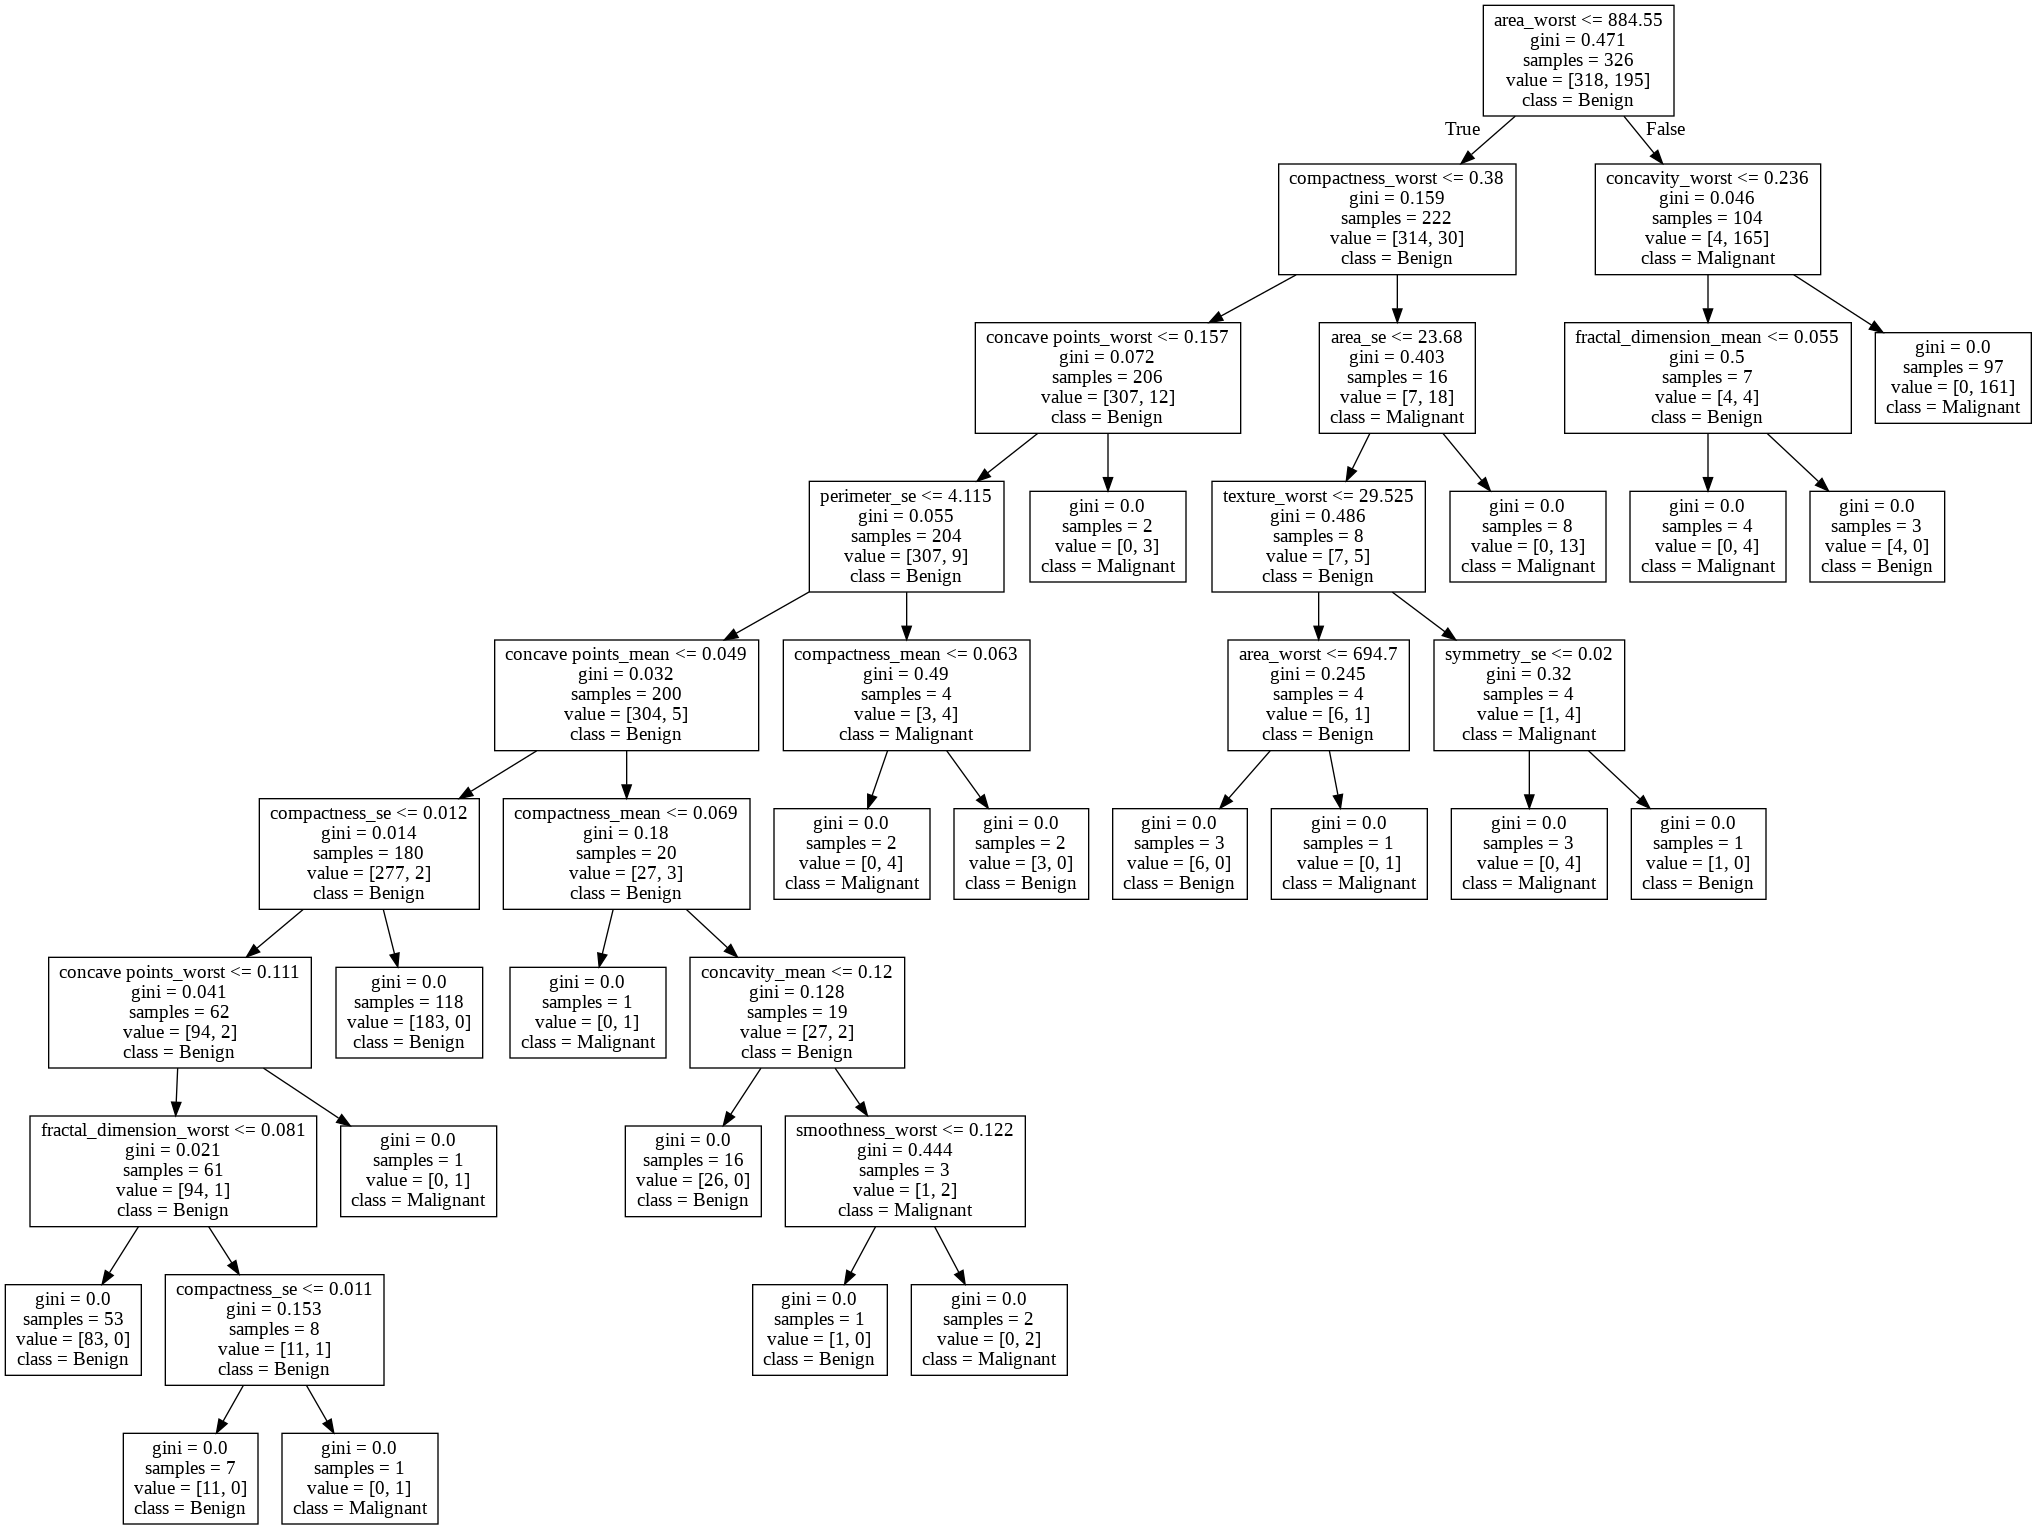

In [0]:
image = Image.open("cancer_1.png")
image

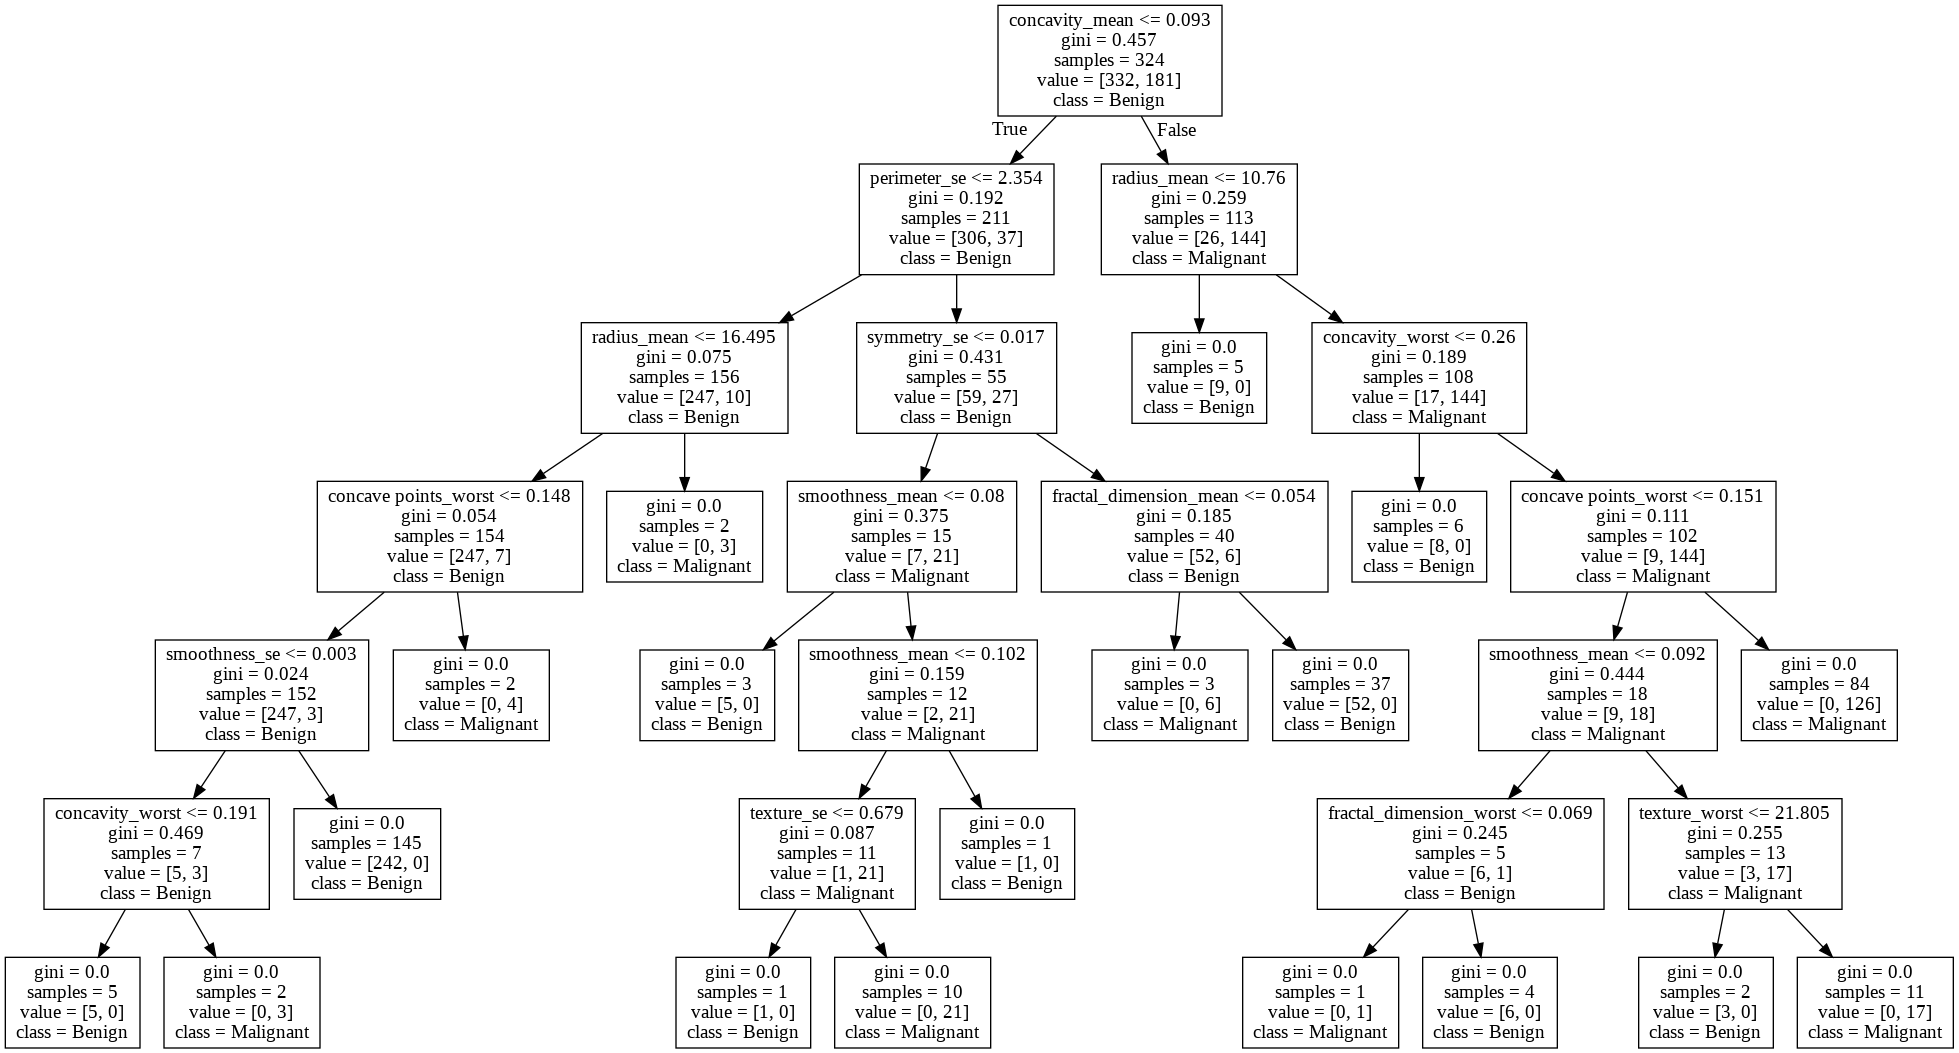

In [0]:
image = Image.open("cancer_2.png")
image

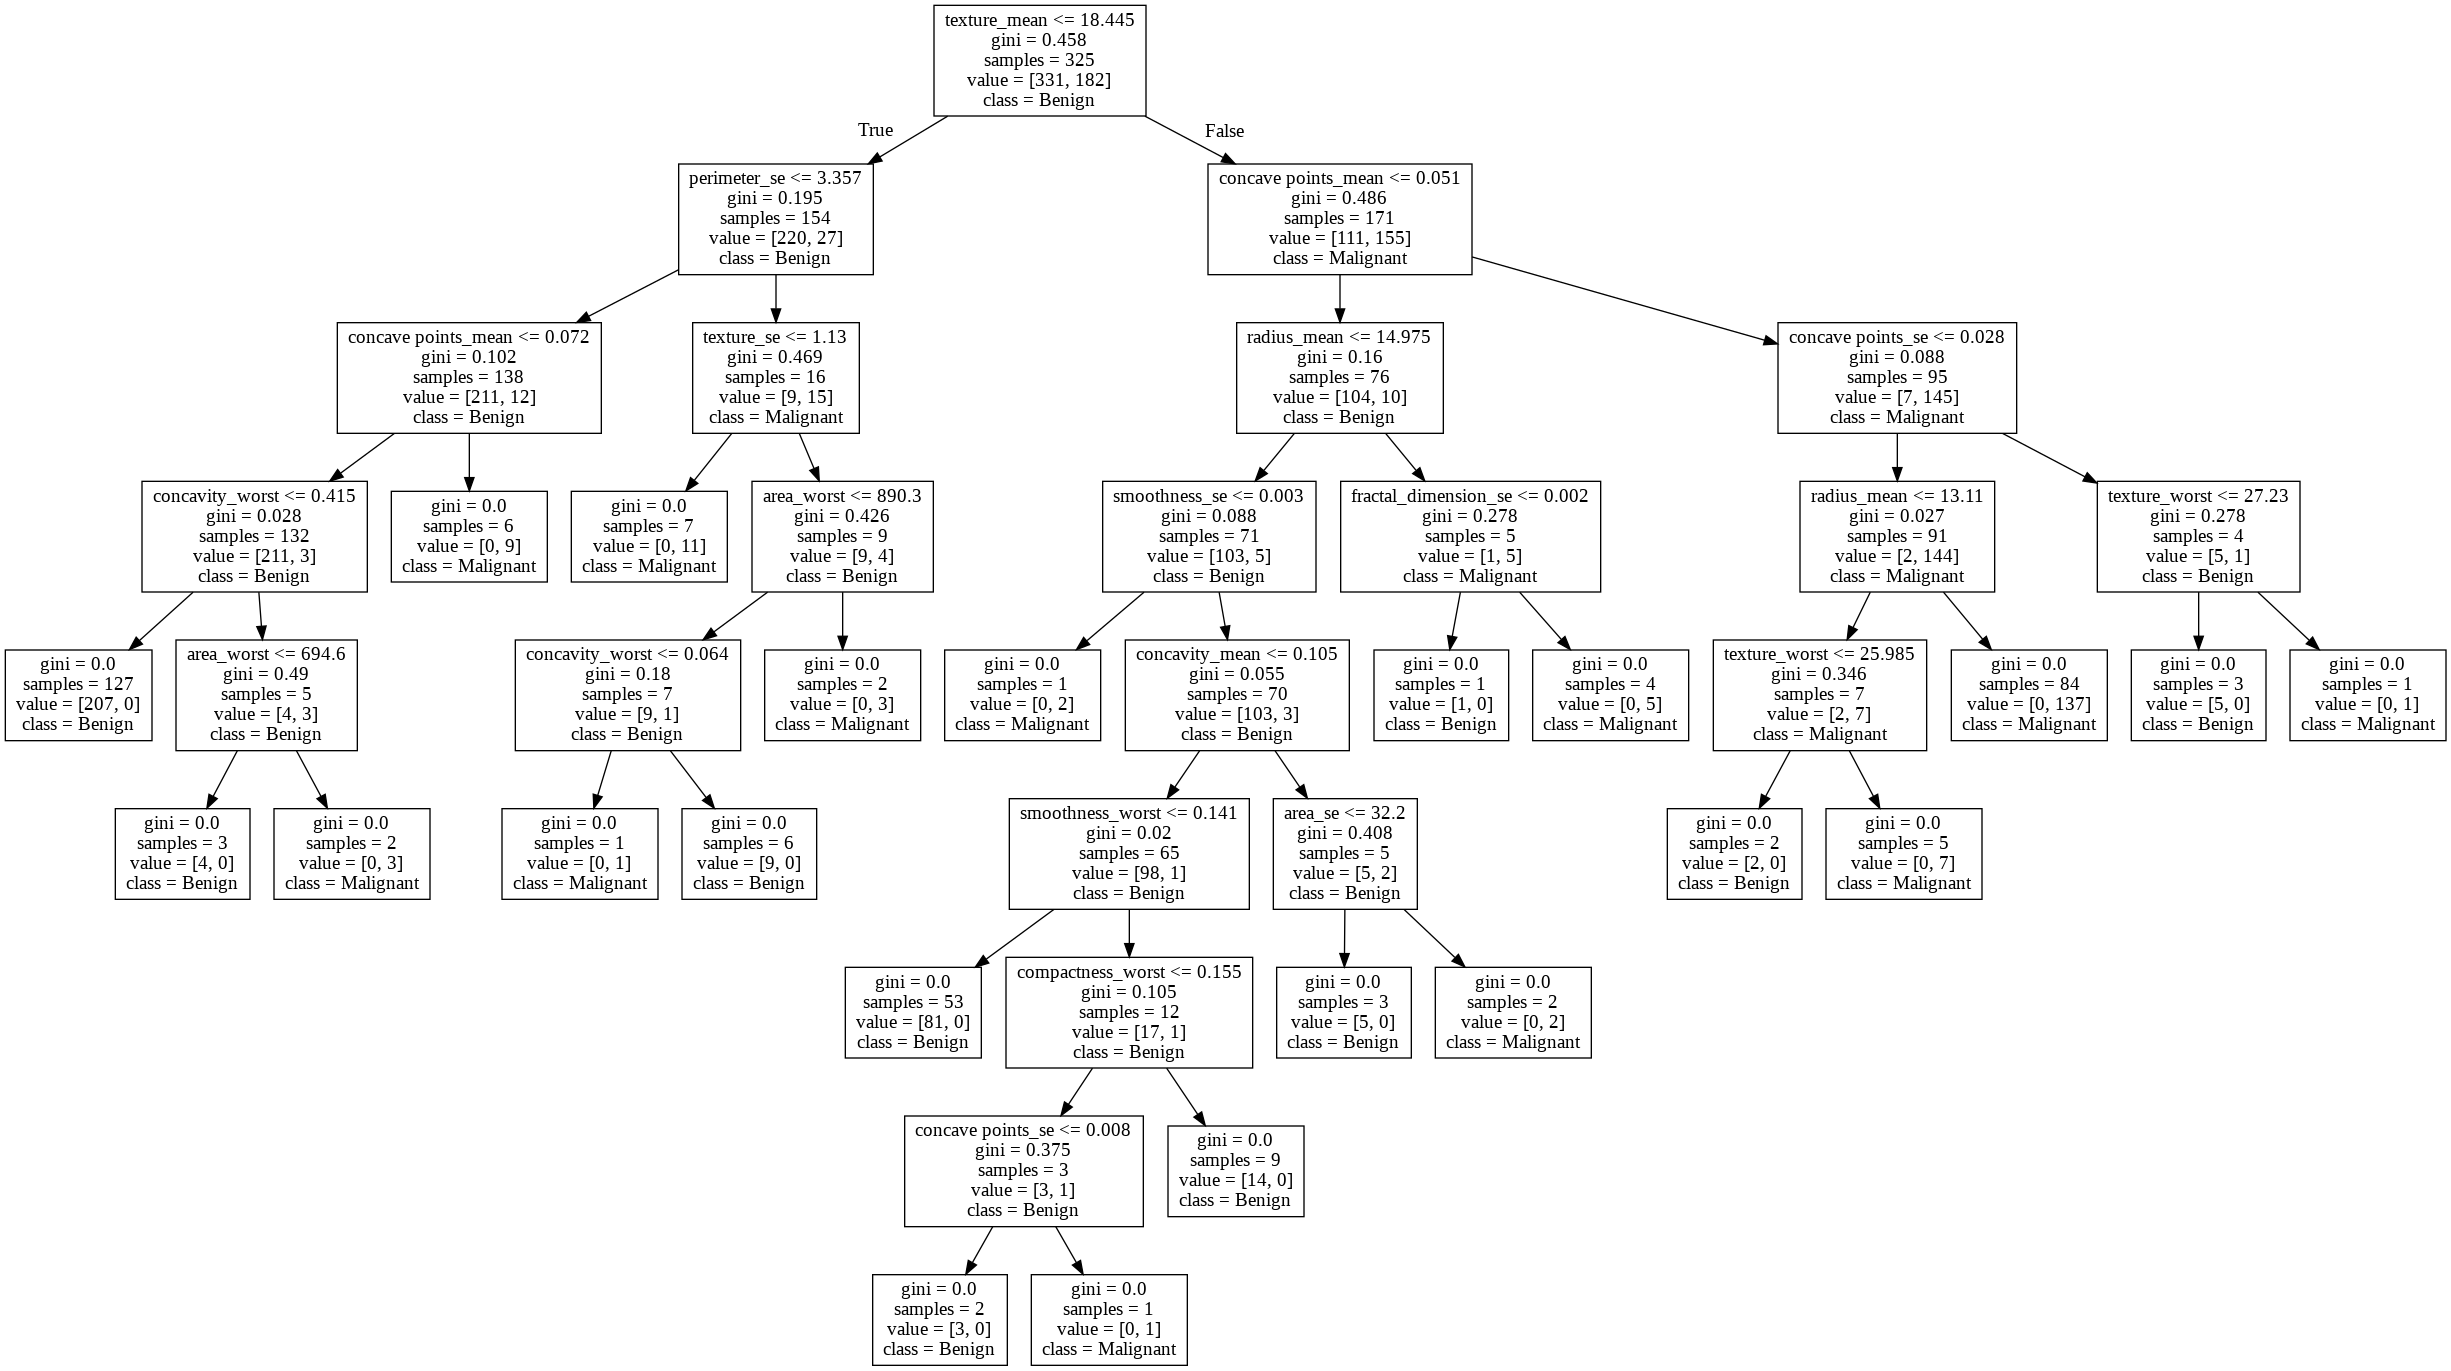

In [0]:
image = Image.open("cancer_3.png")
image

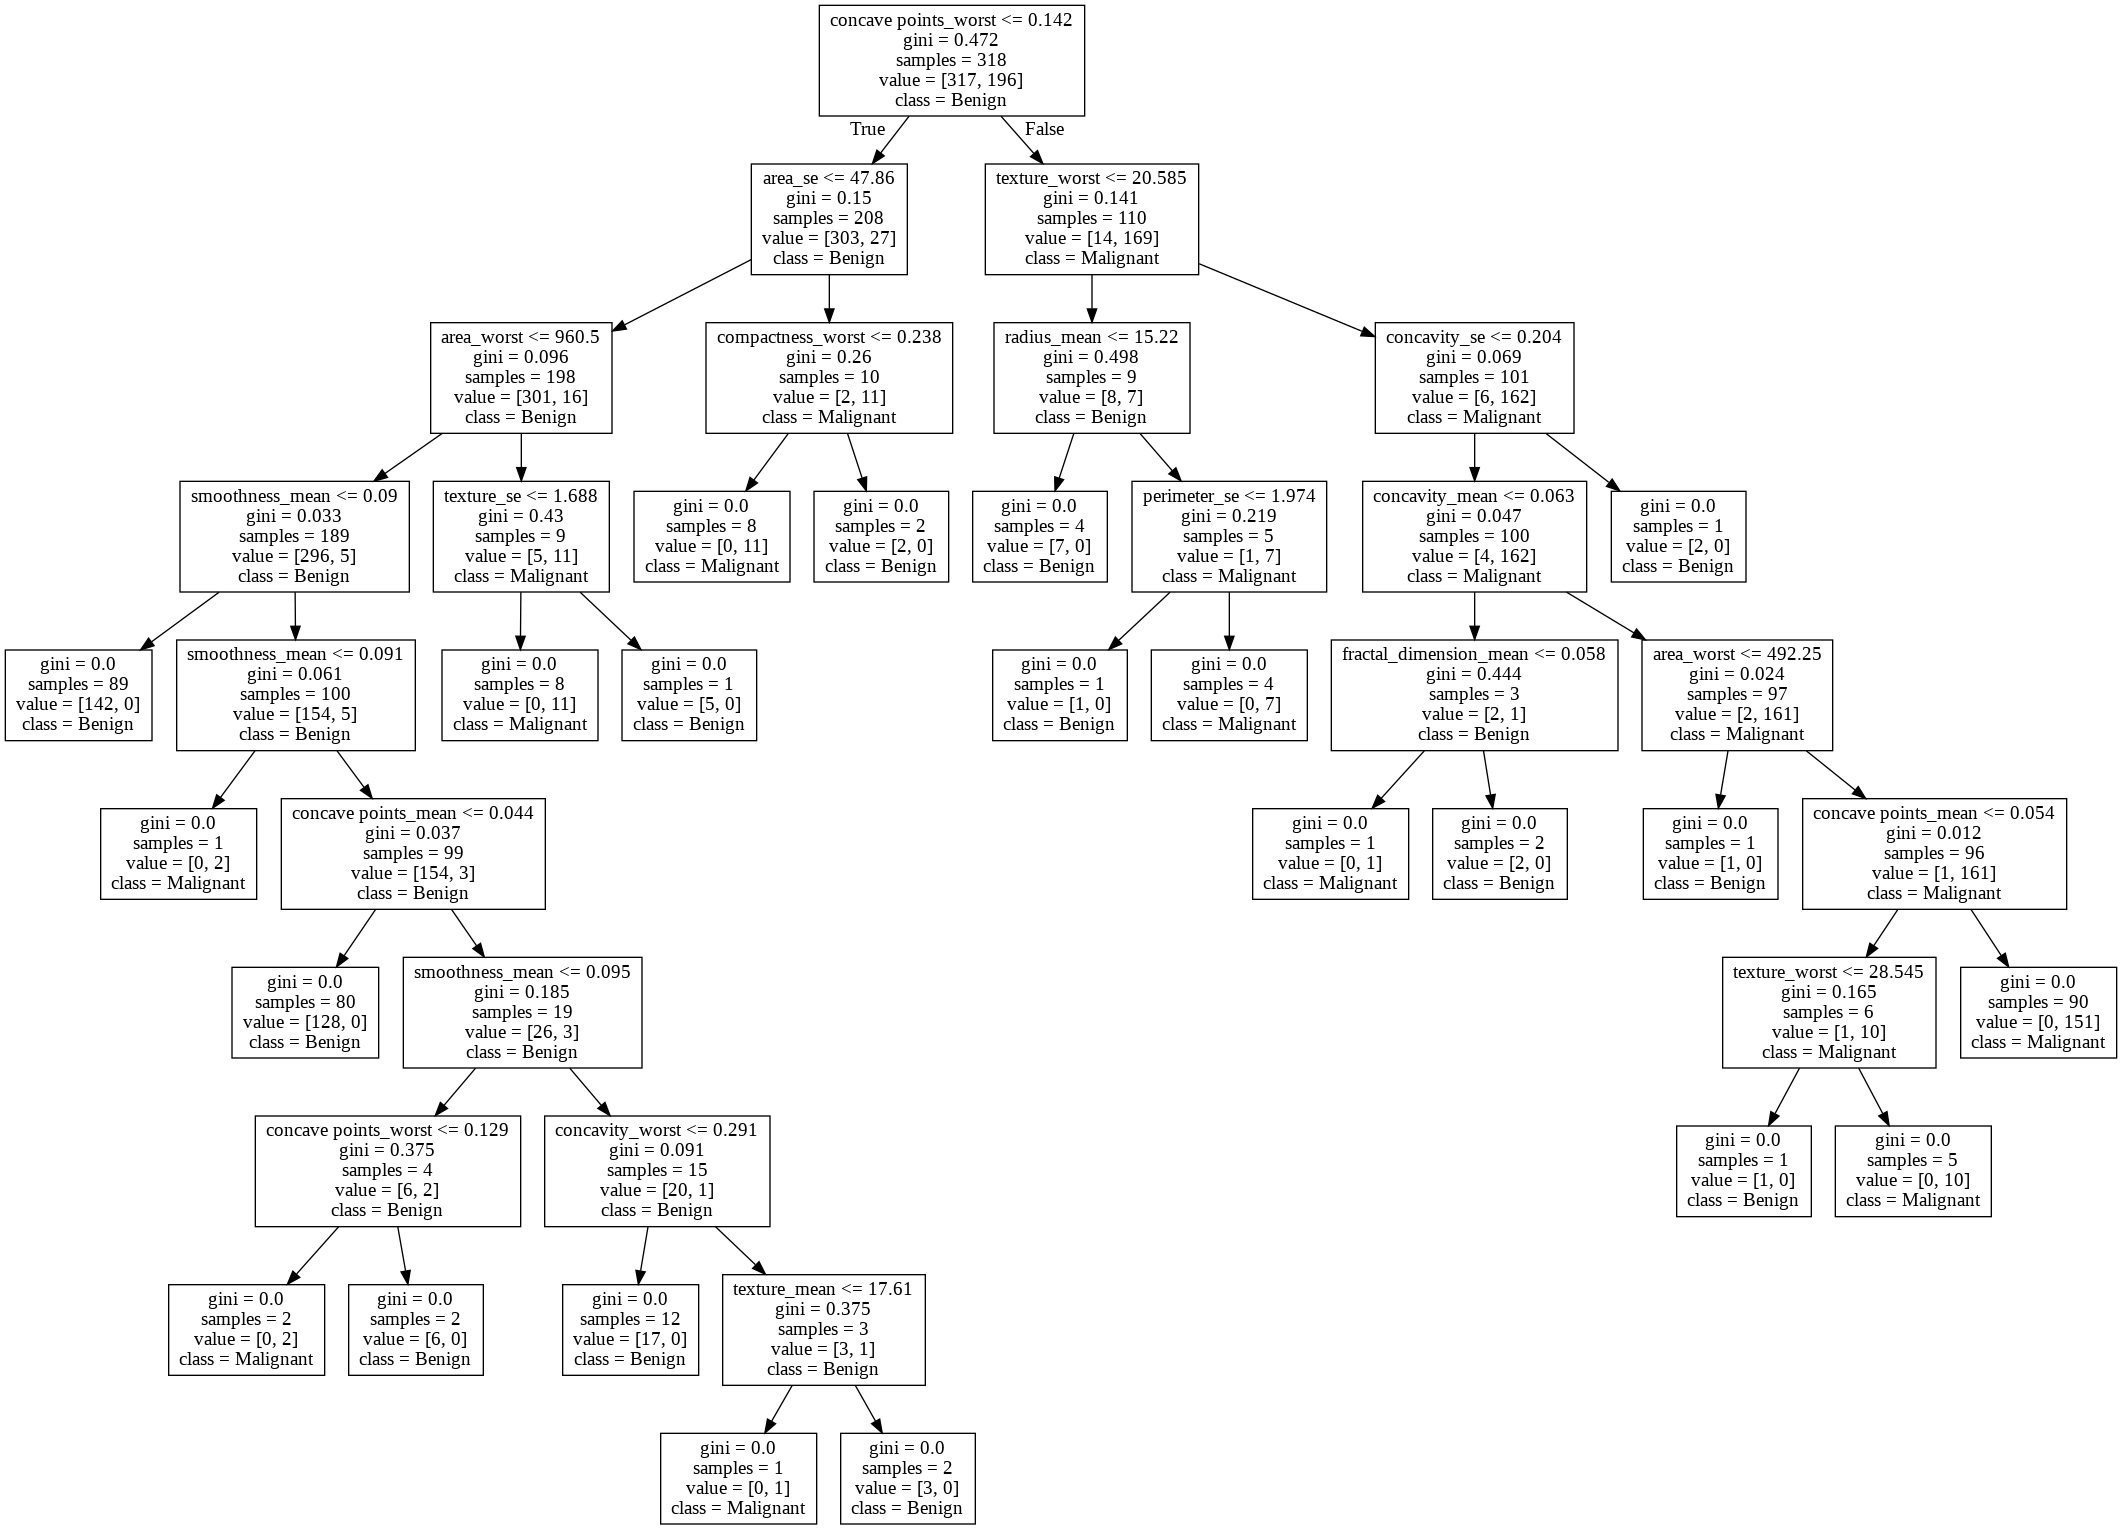

In [0]:
image = Image.open("cancer_4.png")
image

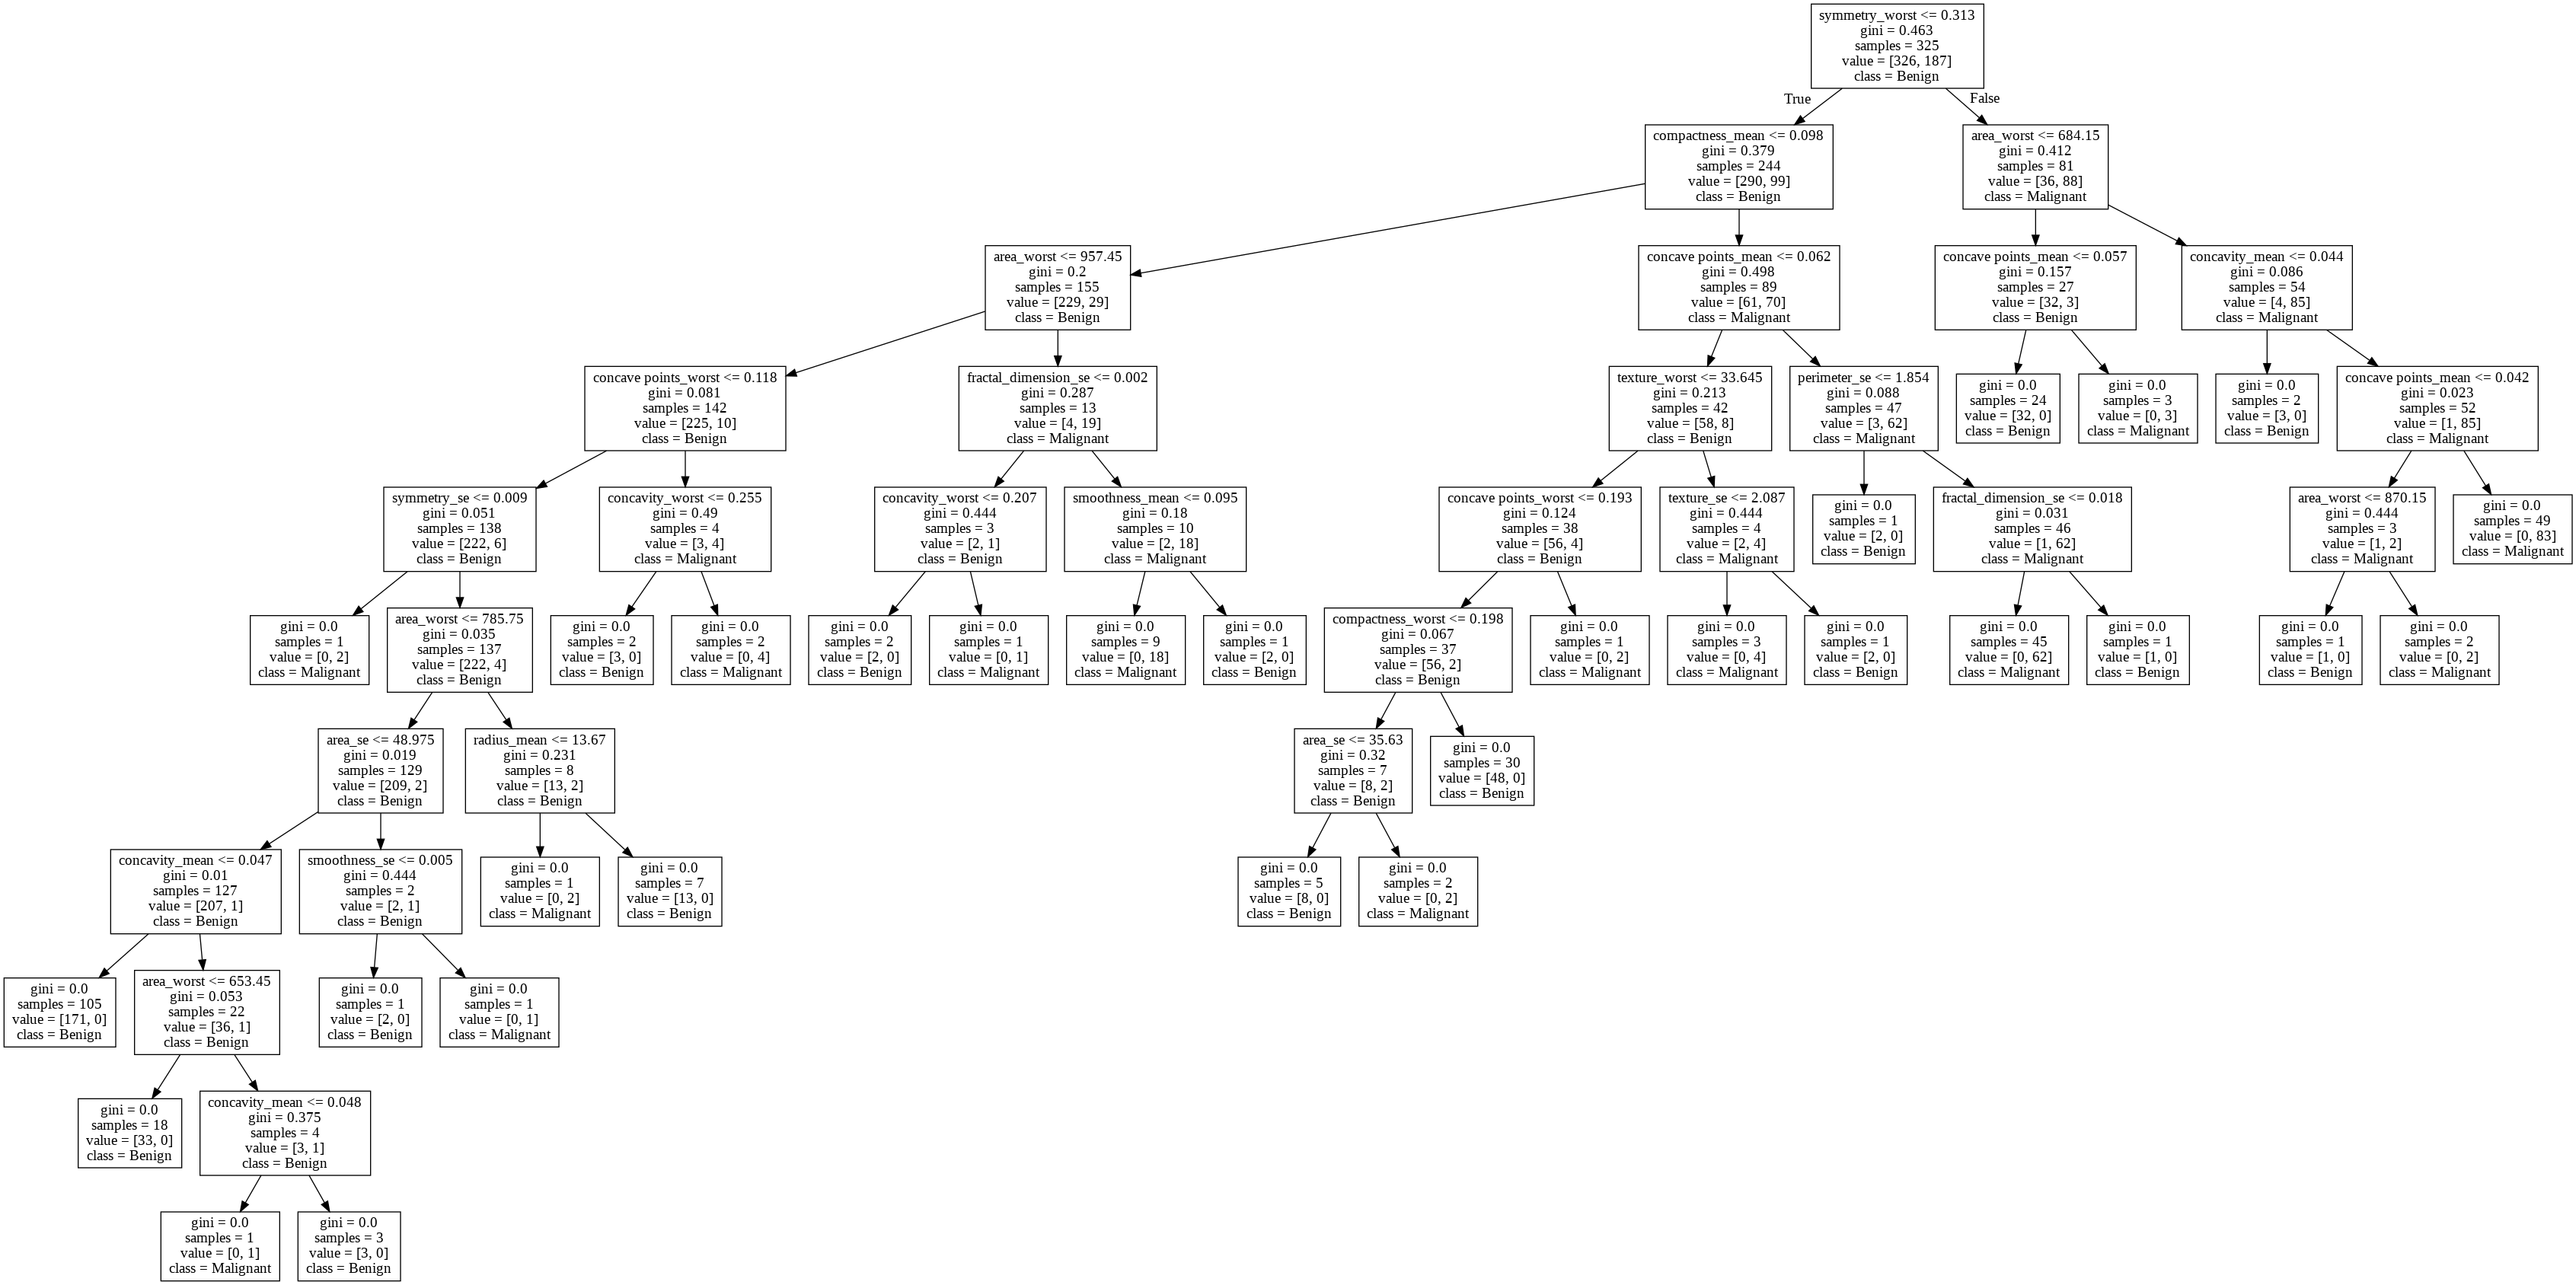

In [0]:
image = Image.open("cancer_5.png")
image

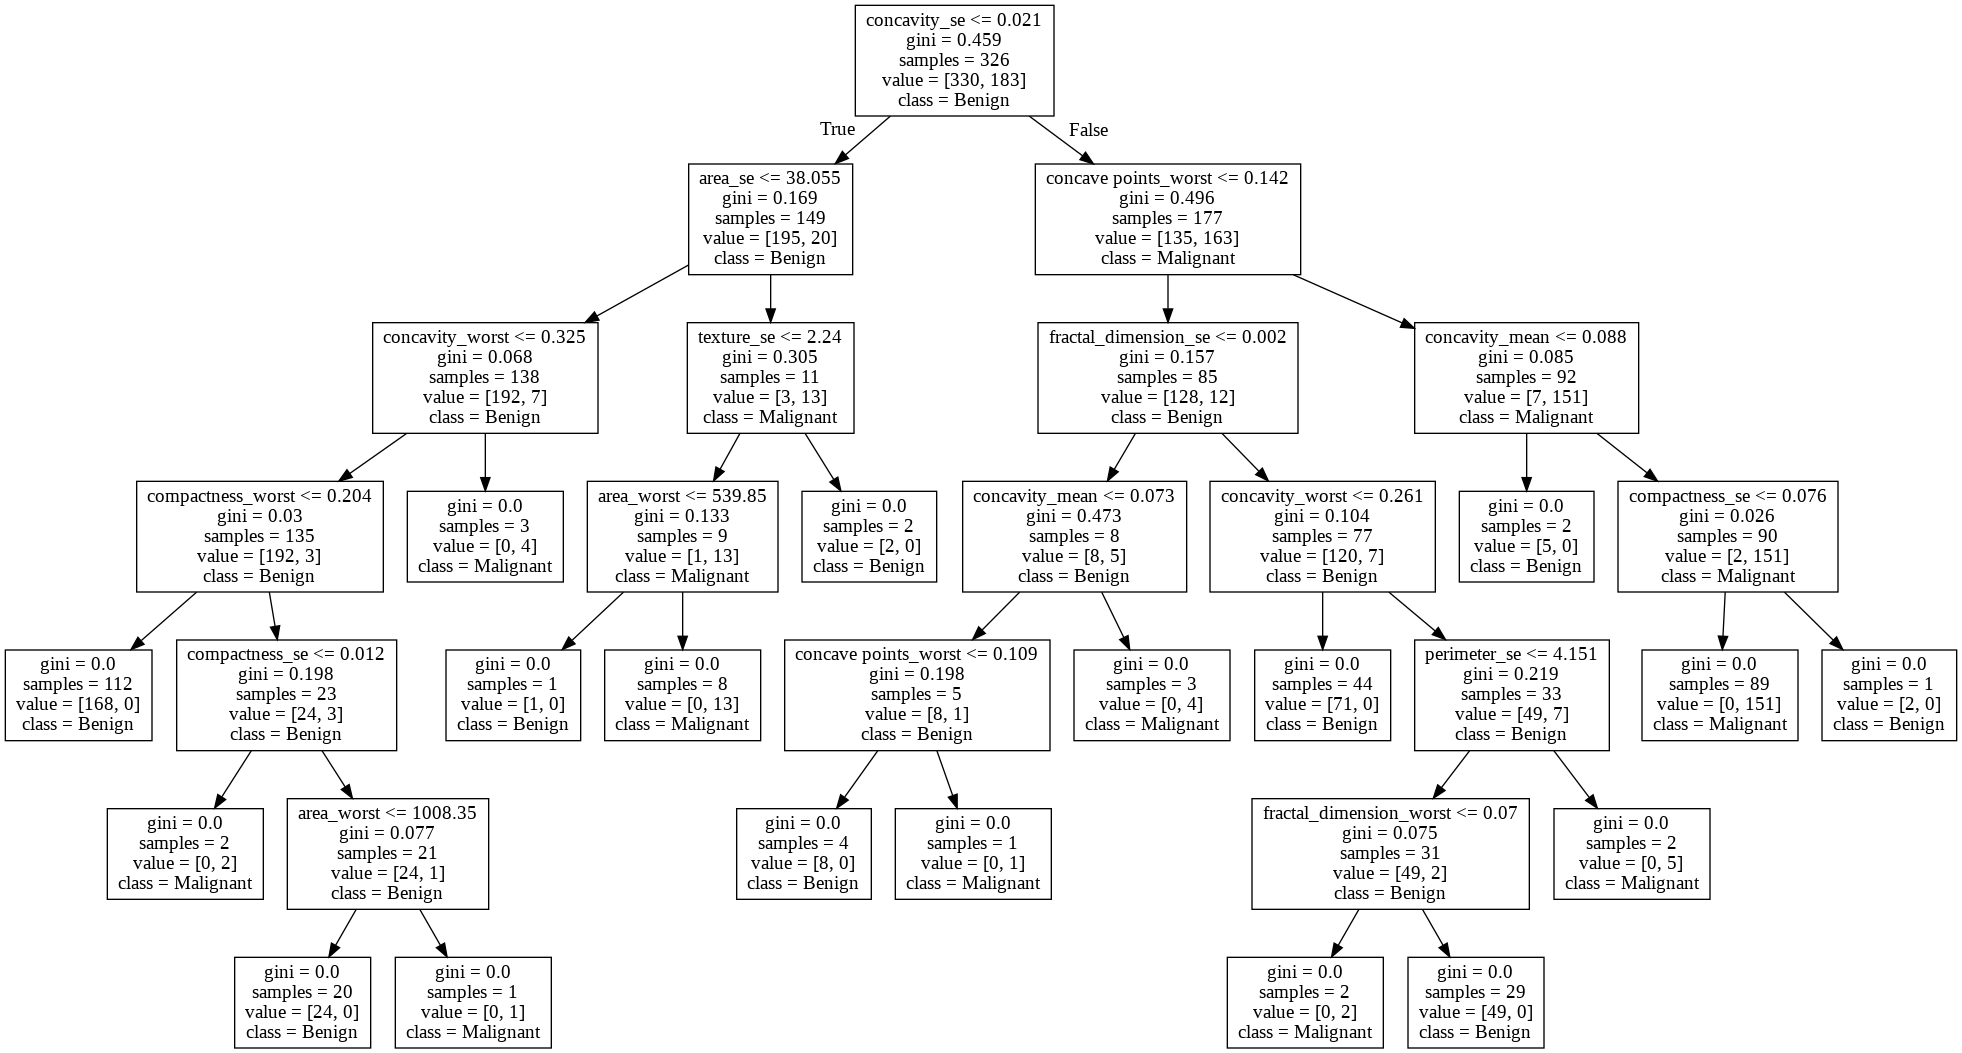

In [0]:
image = Image.open("cancer_6.png")
image

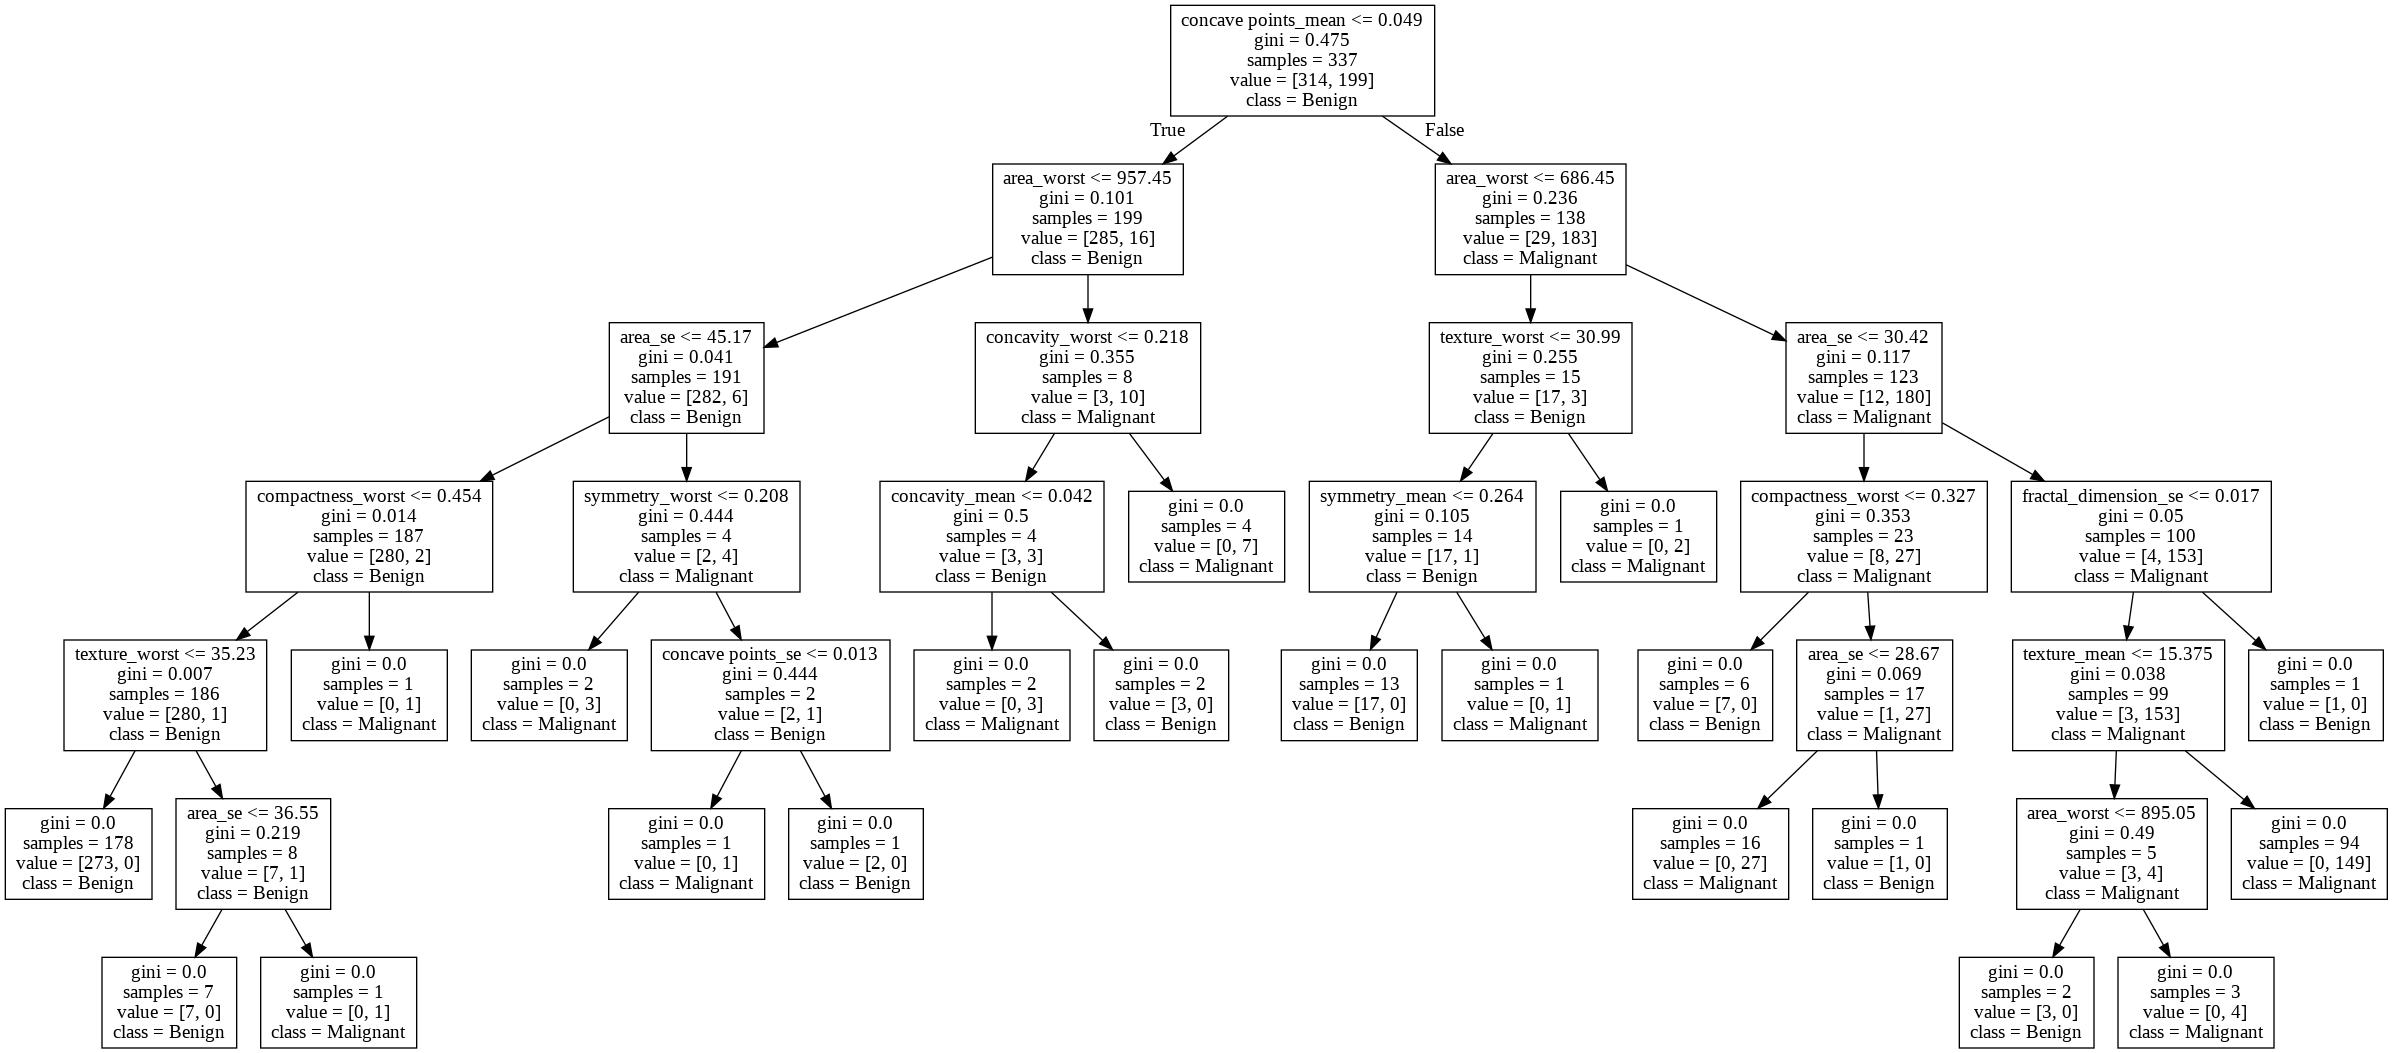

In [0]:
image = Image.open("cancer_7.png")
image

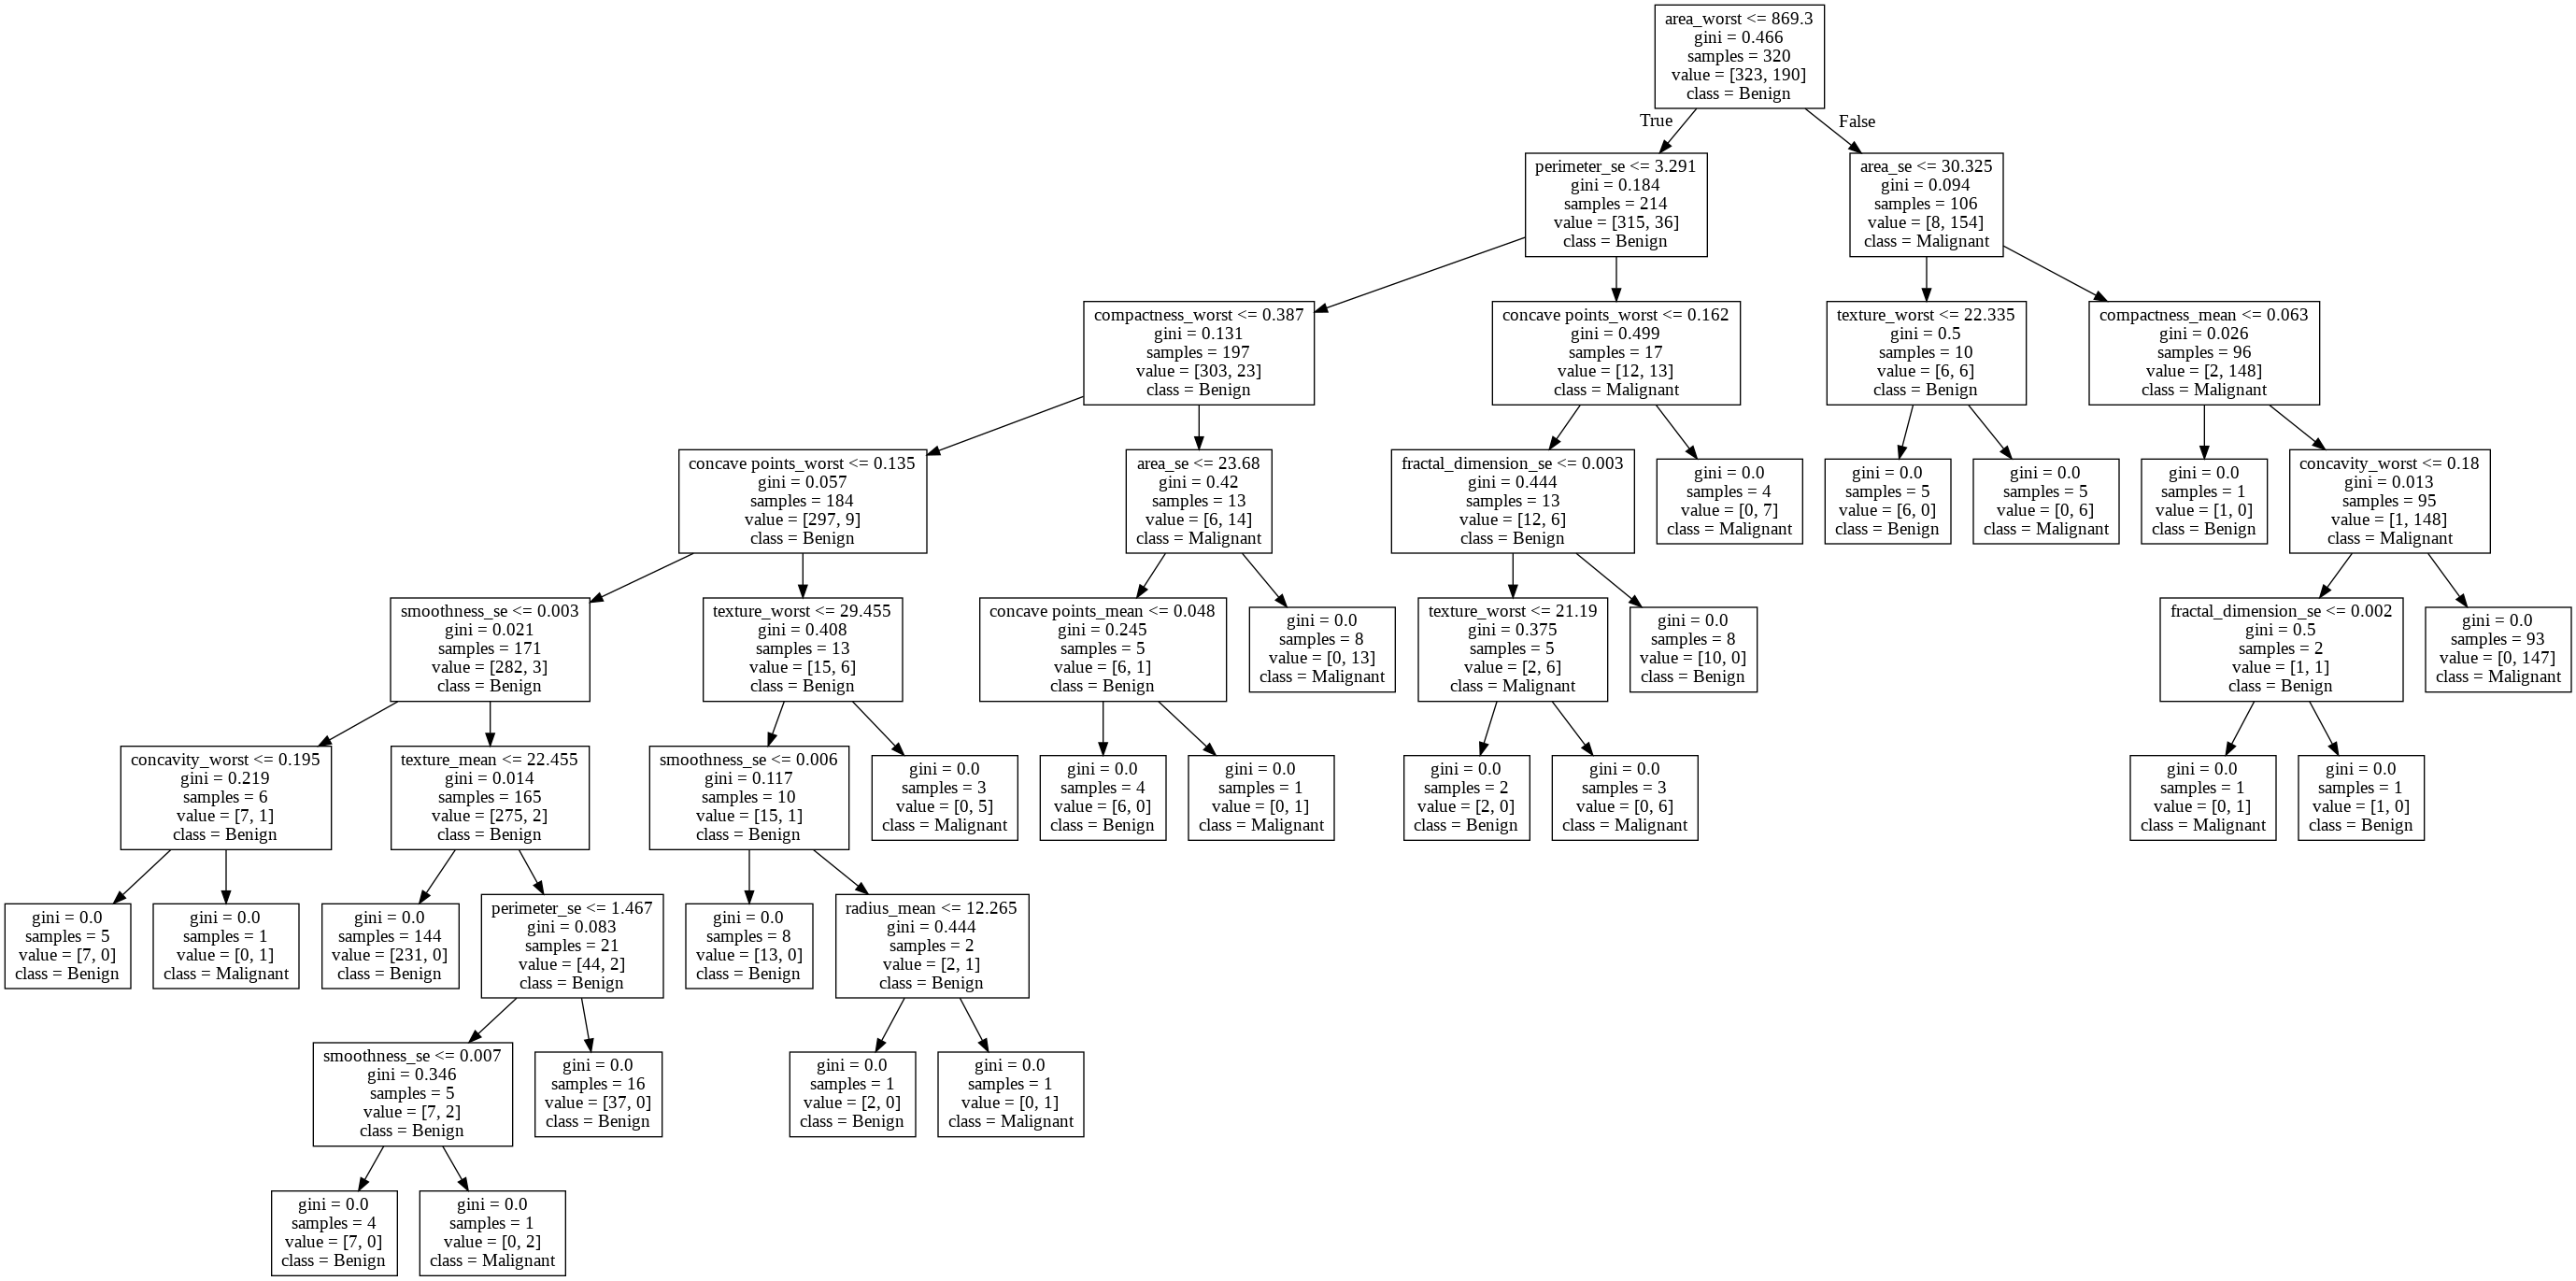

In [0]:
image = Image.open("cancer_8.png")
image

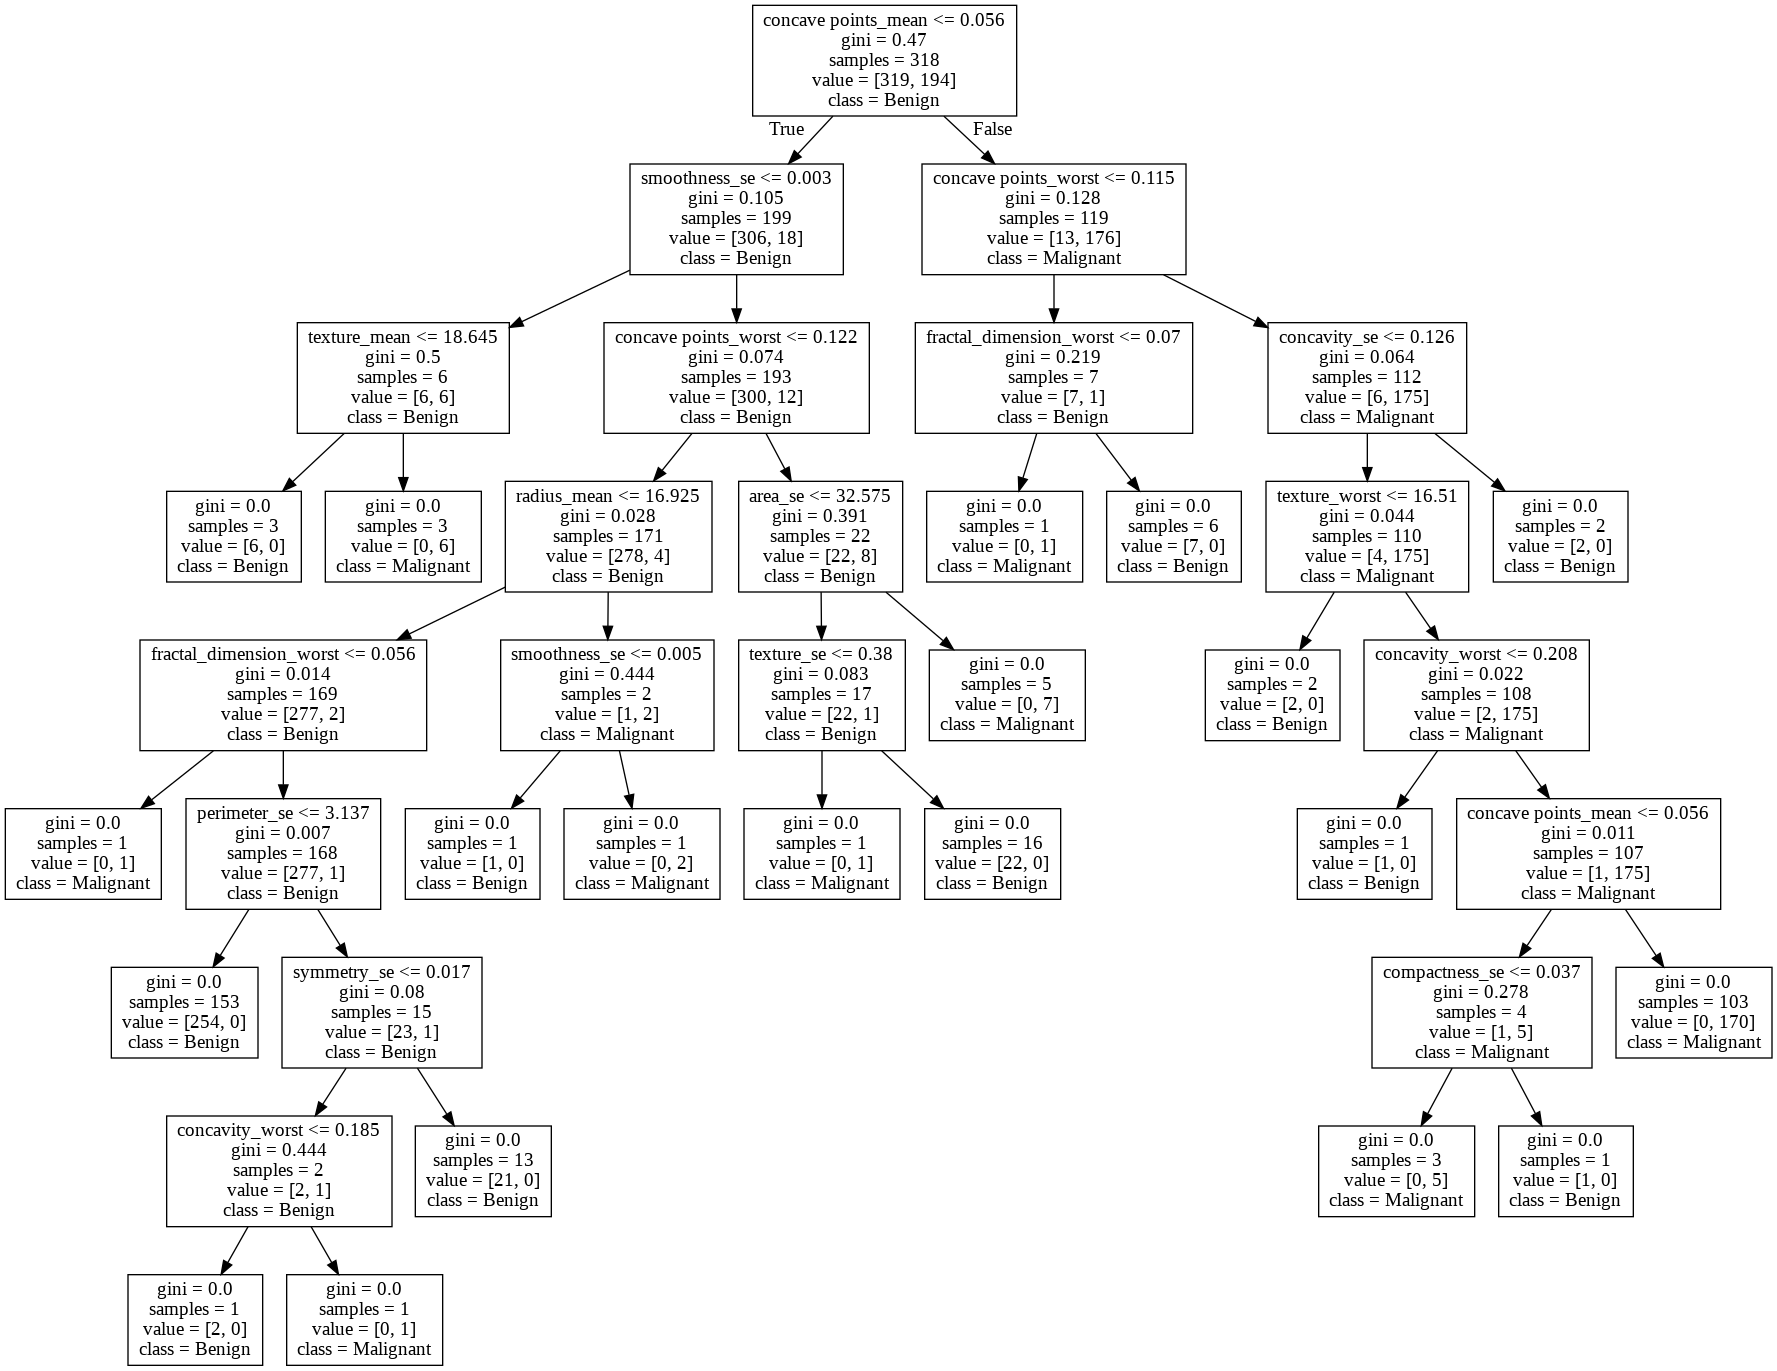

In [0]:
image = Image.open("cancer_9.png")
image

# Conclusion :

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.title = 'Models Result : '
x.field_names = ["Model", "Train AUC performance", "Test AUC Performance"]

x.add_row(["Logistic Regression", "99 %","99 %"])
x.add_row(["SVM", "92 %","99 %"])
x.add_row(["Random forest", "100 %","98 %"])

print(x)

+---------------------+-----------------------+----------------------+
|        Model        | Train AUC performance | Test AUC Performance |
+---------------------+-----------------------+----------------------+
| Logistic Regression |          99 %         |         99 %         |
|         SVM         |          92 %         |         99 %         |
|    Random forest    |         100 %         |         98 %         |
+---------------------+-----------------------+----------------------+


**We can see Random Forest Performing good on our train and test data So we can take Random Forest Model for further prediction on unseen data.**

**Please briefly explain how reinforcement-learning can be utilized in fraud detection
models.**

Reinforcement learning is all about making decisions sequentially. In simple words we can say that the output depends on the state of the current input and the next input depends on the output of the previous input.

**Please describe when to use logistic sigmoid, tanh, and Fourier as basis function.**


sigmoid and tanh function is generally used in classification problem, 

**sigmoid function**: sigmoid function(f(x)=1/(1+exp(-x)) gives values between [0,1] like if we want probabilistic result from data we can use sigmoid function. Logistic regression uses sigmoid function to overcome outlier and loss effect. sigmoid function is used in generally binary classification problem, we also can use sigmoid function in Neural network but it will stuck in vanishing gradient problem.

**tanh function**: tanh function((e^z-e^(-z))/(e^z+e^(-z)) will give result between [-1,1], we can also use tanh in Neural network it is similar like sigmoid but it give output between [-1,1]. It also have problem of vanishing gradient problem in Neural Network.

**Fourier Function** : Fourier function is uses to analyze time series data. it converts time domain signal into frequency domain. The function accepts a time signal as input and produces the frequency representation of the signal as an output.

Every signal in the real world is a time signal and is made up of many different frequencies. So, time domain signal can be converted into the frequency domain to view different frequency components.